# EDA on PUBG players data

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

from scipy import stats

import seaborn as sns

In [2]:
df = pd.read_csv (r'C:\Users\DELL\Desktop\DataScience\Projects\project5\data.csv')

In [3]:
df.shape

(1111742, 30)

In [4]:
df.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [5]:
df['Unnamed: 0']

0          2093518
1          3701672
2          2059784
3          1302036
4           297180
            ...   
1111737    4209703
1111738    4311549
1111739    3521011
1111740    2138826
1111741     609836
Name: Unnamed: 0, Length: 1111742, dtype: int64

In [6]:
del df["Unnamed: 0"]

In [7]:
df.set_index("Id" ,inplace=True)

In [8]:
df.head()

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Id,,,,,,,,,,,,,,,,,,,,,
a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,84,1437,...,0,0.0,0,0.0,0,0,151.30,1,1525,0.0667
43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,57,1225,...,0,0.0,0,0.0,0,0,1918.00,7,1516,0.5862
9a68690e31fdff,4a72ffa2cebd90,d6aad3f9830e60,0,1,47.73,0,0,0,50,0,...,0,4088.0,0,0.0,0,0,820.00,7,0,0.8105
b147e1bd448fc4,9a8991656b3fea,d931c0932d8aca,0,0,0.00,0,0,0,56,1286,...,1,0.0,0,0.0,0,0,38.81,0,1515,0.5556
d818b4edd59612,eece87c8b846b3,ec2b5ed94baae3,0,2,100.00,0,0,3,31,0,...,0,918.4,0,0.0,0,0,1721.00,5,0,0.6429


In [9]:
df.tail()

,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
Id,,,,,,,,,,,,,,,,,,,,,
43739241d6a8e8,afb7c87045825e,ad5719d2422207,0,0,70.31,0,0,0,68,0,...,0,0.0,0,0.000,0,0,799.80,2,0,0.3929
d57c8a22a9e38b,85e0624ddd2cb0,c3f50eef6dbb01,0,3,334.10,0,0,1,10,0,...,0,1549.0,0,0.000,0,0,2777.00,7,0,0.8542
c7ad131758ba55,b3759687b385b3,990a8d68ec2bc4,0,0,119.30,1,0,0,25,0,...,0,0.0,0,0.000,0,0,60.45,1,0,0.7174
8237d06ea2c508,13a05023ab7735,f93b1f0defaee5,1,4,53.51,1,0,7,45,0,...,1,3610.0,0,0.000,1,0,2209.00,4,0,0.9000
9beb0064c56445,5cfa1834dc5b11,0406ce4ab7a1bd,5,3,607.40,3,0,3,15,1691,...,0,713.9,0,8.912,0,0,3713.00,5,1611,1.0000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1111742 entries, a3e3cea9f2e314 to 9beb0064c56445
Data columns (total 28 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   groupId          1111742 non-null  object 
 1   matchId          1111742 non-null  object 
 2   assists          1111742 non-null  int64  
 3   boosts           1111742 non-null  int64  
 4   damageDealt      1111742 non-null  float64
 5   DBNOs            1111742 non-null  int64  
 6   headshotKills    1111742 non-null  int64  
 7   heals            1111742 non-null  int64  
 8   killPlace        1111742 non-null  int64  
 9   killPoints       1111742 non-null  int64  
 10  kills            1111742 non-null  int64  
 11  killStreaks      1111742 non-null  int64  
 12  longestKill      1111742 non-null  float64
 13  matchDuration    1111742 non-null  int64  
 14  matchType        1111742 non-null  object 
 15  maxPlace         1111742 non-null  int64  
 16  num

In [11]:
df.isnull().sum()

groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       1
dtype: int64

In [12]:
df.dropna(inplace=True)

In [13]:
df.isnull().sum()

groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
matchDuration      0
matchType          0
maxPlace           0
numGroups          0
rankPoints         0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
assists,1111741.0,0.233674,0.589403,0.0,0.0,0.0000,0.0000,17.0
boosts,1111741.0,1.106656,1.716051,0.0,0.0,0.0000,2.0000,24.0
damageDealt,1111741.0,130.736525,171.175570,0.0,0.0,84.1100,185.9000,5990.0
DBNOs,1111741.0,0.657362,1.146023,0.0,0.0,0.0000,1.0000,35.0
headshotKills,1111741.0,0.226649,0.603336,0.0,0.0,0.0000,0.0000,64.0
heals,1111741.0,1.370349,2.683820,0.0,0.0,0.0000,2.0000,73.0
killPlace,1111741.0,47.595664,27.470224,1.0,24.0,47.0000,71.0000,100.0
killPoints,1111741.0,504.430571,627.400716,0.0,0.0,0.0000,1171.0000,2170.0
kills,1111741.0,0.925511,1.562216,0.0,0.0,0.0000,1.0000,72.0
killStreaks,1111741.0,0.544851,0.712903,0.0,0.0,0.0000,1.0000,20.0


In [15]:
df.corr().head(15).T

,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,maxPlace,numGroups,rankPoints
assists,1.000000,0.306582,0.409369,0.302200,0.199487,0.228456,-0.289985,0.038331,0.322067,0.243386,0.260407,-0.019401,-0.147629,-0.146553,-0.015586
boosts,0.306582,1.000000,0.519600,0.357902,0.331536,0.535387,-0.554047,0.008992,0.499478,0.403484,0.421444,0.071469,-0.013298,-0.012530,0.022660
damageDealt,0.409369,0.519600,1.000000,0.735084,0.613306,0.341620,-0.676136,0.050217,0.889038,0.703222,0.561656,-0.007610,-0.041204,-0.040571,-0.001614
DBNOs,0.302200,0.357902,0.735084,1.000000,0.467393,0.265348,-0.554860,0.042138,0.706211,0.646344,0.449521,-0.014083,-0.267303,-0.265377,-0.002738
headshotKills,0.199487,0.331536,0.613306,0.467393,1.000000,0.197936,-0.468080,0.024202,0.673739,0.513207,0.444803,-0.018889,0.008062,0.008235,0.005047
heals,0.228456,0.535387,0.341620,0.265348,0.197936,1.000000,-0.385498,-0.001991,0.310537,0.268948,0.262337,0.107886,-0.064127,-0.063574,0.018507
killPlace,-0.289985,-0.554047,-0.676136,-0.554860,-0.468080,-0.385498,1.000000,-0.023595,-0.728968,-0.809671,-0.539513,-0.004889,0.015850,0.017791,-0.014798
killPoints,0.038331,0.008992,0.050217,0.042138,0.024202,-0.001991,-0.023595,1.000000,0.036511,0.037883,0.013884,-0.098799,-0.044097,-0.041700,-0.975461
kills,0.322067,0.499478,0.889038,0.706211,0.673739,0.310537,-0.728968,0.036511,1.000000,0.802054,0.600461,-0.031484,-0.005442,-0.004645,0.007880
killStreaks,0.243386,0.403484,0.703222,0.646344,0.513207,0.268948,-0.809671,0.037883,0.802054,1.000000,0.512811,-0.035358,-0.037212,-0.035947,0.002854


In [16]:
df.corr().tail(10).T

,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
assists,0.197938,0.110496,0.012366,0.022871,0.007775,0.058241,0.288579,0.244594,0.023340,0.297738
boosts,0.254125,0.329281,0.033775,0.107880,0.014645,0.085997,0.639361,0.405301,-0.006973,0.633482
damageDealt,0.256318,0.139840,0.050660,0.037509,0.016209,0.079900,0.396620,0.354514,0.017989,0.438973
DBNOs,0.301098,0.101882,0.035705,0.018726,0.071295,0.059857,0.284050,0.217667,0.010482,0.279322
headshotKills,0.149131,0.076274,0.011974,0.029987,0.009198,0.039857,0.249591,0.215612,0.005029,0.276170
heals,0.236400,0.297734,0.023416,0.080991,0.035847,0.062720,0.429283,0.308228,-0.010303,0.427296
killPlace,-0.270057,-0.236372,-0.057496,-0.089924,-0.039589,-0.072698,-0.590132,-0.489745,-0.002612,-0.719051
killPoints,0.012730,-0.027882,-0.004503,-0.005820,-0.039932,-0.009321,0.004882,-0.004247,0.983443,0.013089
kills,0.253222,0.114664,0.061824,0.039986,0.019248,0.078644,0.373495,0.338190,0.007204,0.418527
killStreaks,0.241888,0.098000,0.065413,0.034264,0.030051,0.062696,0.326997,0.275110,0.009181,0.376840


In [17]:
for i in df['killPoints']:
    if(i == -1):
        print(i)

In [18]:
df.killPoints.replace(to_replace=[0], value=np.nan, inplace=True)

In [19]:
df.rankPoints.replace(to_replace=[-1], value=np.nan, inplace=True)

In [20]:
df.winPoints.replace(to_replace=[0], value=np.nan, inplace=True)

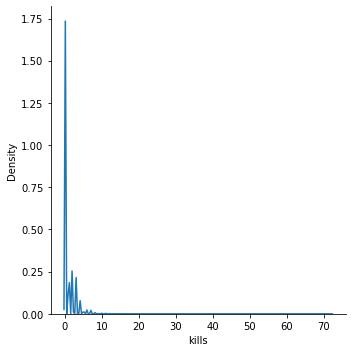

In [21]:
sns.displot(data=df,x=df.kills,kind="kde")
plt.show()

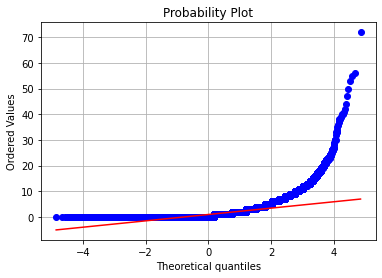

In [22]:
stats.probplot(df['kills'], dist="norm", plot=plt)

plt.grid()

### Observation
- We see that there maybe some outliers in the Data using the Q-Q plot

---

# Visualization

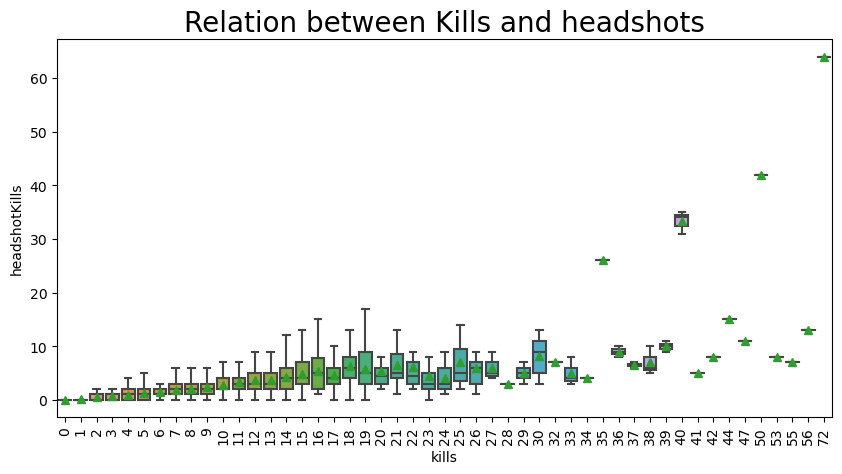

In [23]:
plt.figure(figsize=(10, 5),dpi=100)
sns.boxplot(x = df.kills, y = df.headshotKills,showmeans=True,sym='')#,sym=''
plt.title('Relation between Kills and headshots',fontsize=20)
plt.xticks(rotation=90)
plt.show()

### Observation
- We see that there is a player with 72 kills and 60+ headshots there is a very good chance that this player is using AimBot(hacks) to get a Chicken Dinner

In [24]:
df[df['kills'] > 40].T

Id,97047ef60af1e7,36c5d7b936e078,c47bd86daa3de6,a14d787063ba9a,1f6ceaa5140fb6,06308c988bf0c2,2ade4369bccd12,f241fdbb4f94c6,84f646d02cba7a
groupId,f02fdd0b3071d3,fa23463effba78,4df3e348b910d8,e64b5285fd2987,dc2fef63e14d5c,4c4ee1e9eb8b5e,9f9e64a3db8384,fadbbc4cbb3e06,7e3a62ea8f1832
matchId,5921b55b9e96b5,b06aa721ab324a,3ebf1bf8bc6bae,e024bf51bf1799,f900de1ec39fa5,6680c7c3d17d48,e024bf51bf1799,e024bf51bf1799,6680c7c3d17d48
assists,11,13,2,9,15,7,12,9,8
boosts,0,0,2,0,0,4,0,0,3
damageDealt,5520,4750,4495,4263,5468,5990,5557,3707,3641
DBNOs,0,0,0,0,0,0,0,0,0
headshotKills,8,8,42,11,13,64,7,5,15
heals,4,6,2,4,5,10,4,1,3
killPlace,1,1,1,2,2,1,1,5,2
killPoints,NaN,1000,1000,NaN,NaN,NaN,NaN,NaN,NaN


### Observation
- player ID **c47bd86daa3de6** and **06308c988bf0c2** are using hacks as they are having more than **90%** of there kills as headshots

---

In [25]:
min_threshold , max_threshold = df.kills.quantile([0.09,0.99])
min_threshold,max_threshold
#Taking Quantile value to remove outliers from data using percentage method

(0.0, 7.0)

In [26]:
df[df['kills']>max_threshold].T

Id,c47fe53007a65c,4164341c207735,596e8290704a01,cb3b8e1dadf677,d6d02c9586fcb7,037b5e0030ff51,6c9113b7fb8de3,c80731765f5704,967fa56117c473,9fa0a84c3b4952,...,9cd86df50ed0ab,d4598ab69d286a,7dea876e2eb924,b97e8e75121674,44716068f25d4d,6907873545a226,160cb03f4b4937,a59eca69d3b2cc,df1572cbc3475c,d55a8cf856ca86
groupId,645bd9728fd200,d366e9ee466fc9,8aead23a757423,ab8c91ca345052,44aca1dafa73fc,a4026b5e76acaa,f18c2c6b6c6f55,68345b2f762dc8,084f2b3b2b729a,840e9947f1e8f8,...,1eb519c83cbd33,dfb5c8d36eba15,8b844a4112278c,fa1a2aa632f506,998d459d664b0b,76047e5c787218,900da460e2daa5,cb952d38e8f359,3fc70dff8cda76,67b07892fcb353
matchId,bc2202f9800897,cce05352cedd2b,1cb8b2303a03e6,3e976345f390d3,a51e51b5635f23,128eabb50c5e4e,6306d5b936324d,d38a14fb160874,418cd9fe4e889c,37e411848d4290,...,40277ba9cb96f8,a5cf1e439d10e0,d8fc851655d39f,56807ddedb2066,fd00bef0ae0fd8,dbf34301df5e53,ff24b8946f70ea,35b0b5b2df89e8,664dee9ed8f646,ac0a4007348ab8
assists,0,0,1,0,3,5,3,5,2,1,...,0,1,1,1,1,0,0,0,2,1
boosts,9,5,5,3,8,10,8,0,6,6,...,7,3,6,5,1,0,8,9,0,6
damageDealt,772,606.3,1478,1027,1251,1425,828,1075,741.6,973.8,...,929.2,1234,920.5,973.9,782.9,1162,1077,957.1,1061,857.4
DBNOs,4,0,9,0,0,7,4,0,4,5,...,0,0,7,4,8,0,5,0,0,5
headshotKills,2,1,5,2,1,0,1,1,0,0,...,6,2,7,1,3,4,2,6,6,3
heals,8,4,6,8,2,9,5,1,7,3,...,5,4,2,0,5,3,9,5,4,3
killPlace,2,1,1,2,1,2,1,12,2,1,...,1,2,2,1,1,11,2,1,6,1
killPoints,NaN,NaN,NaN,NaN,NaN,1942,NaN,1000,1190,1537,...,NaN,1710,1600,1547,NaN,1000,NaN,1440,NaN,1344


C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


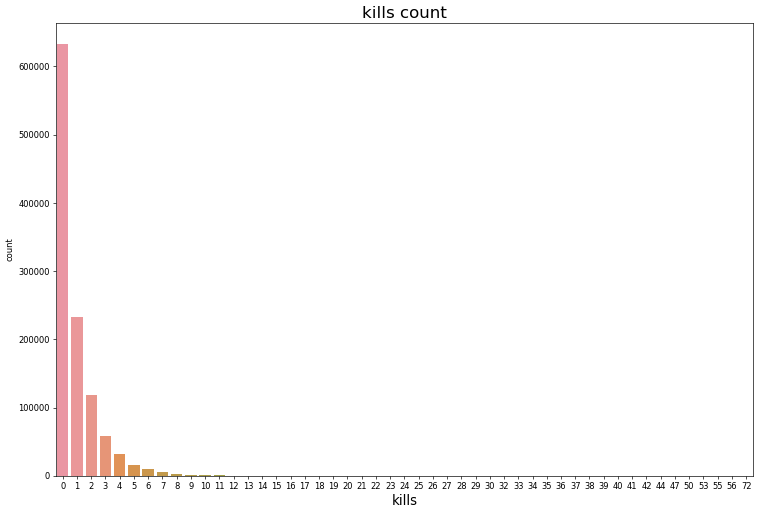

In [27]:
plt.figure(figsize=(15, 10),dpi=60)
sns.countplot(df.kills)
plt.xlabel('kills',fontsize=16)
plt.title('kills count',fontsize=20)
plt.show()

### Observation
- Reading this graph is difficult so lets simplify it

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


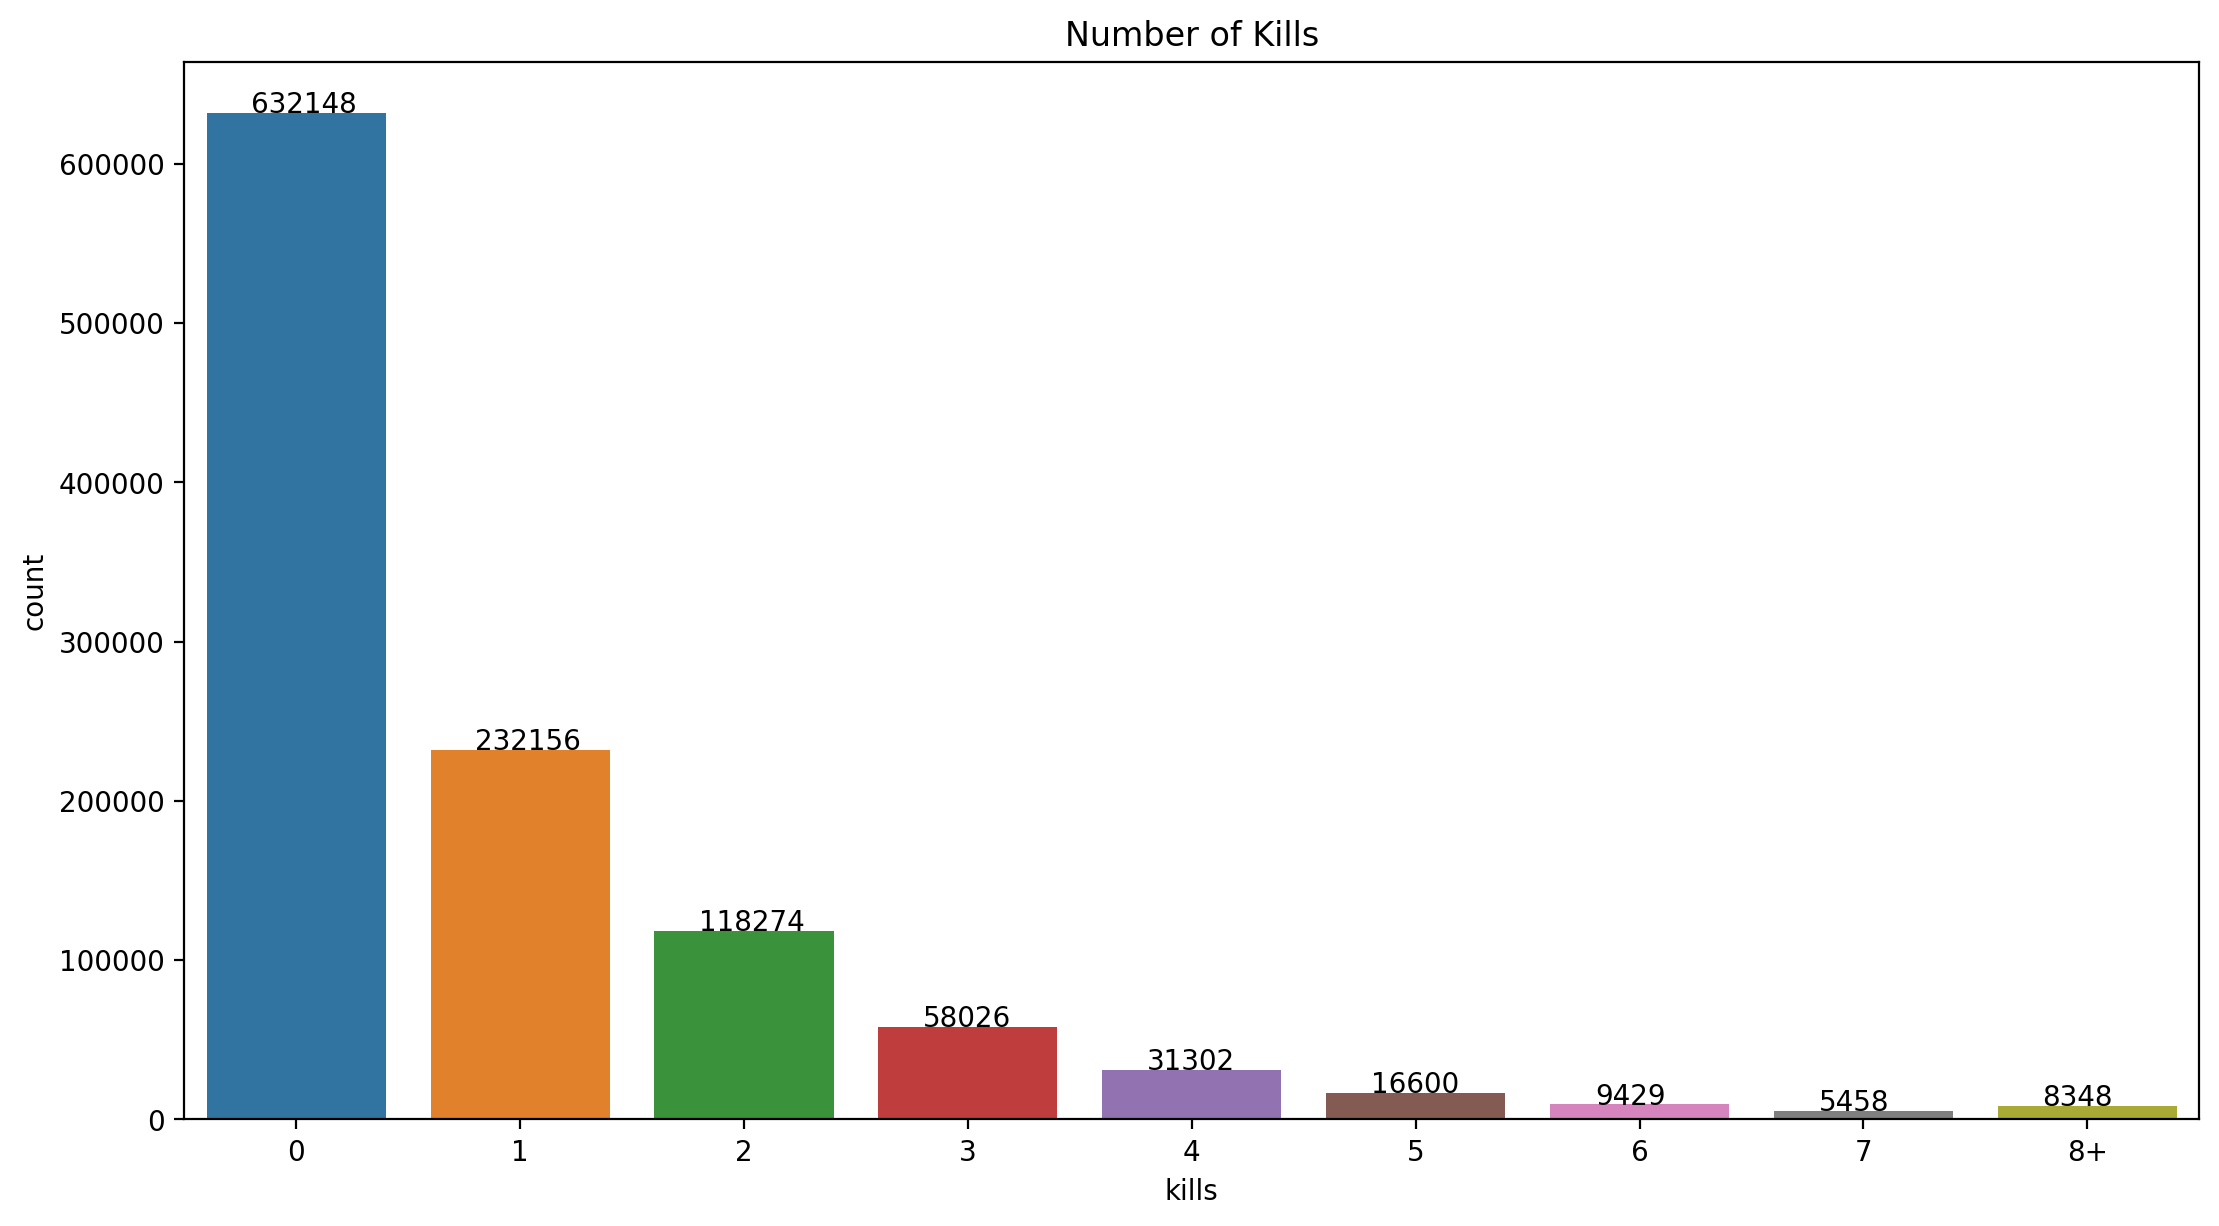

In [28]:
temp= df.copy()
temp.loc[temp['kills'] > max_threshold] = '8+'
plt.figure(figsize=(13,7),dpi=200)
ax = sns.countplot(temp['kills'].astype('str').sort_values())
plt.title('Number of Kills')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+10))
plt.show()



### Observation
- There are over **56.8%** players who scored _0 Kills_
- There are **97.9%** players who manage _atleast 5 kills per game_
- The rest **2.1%** players manage to get _more than 5 kills per game_

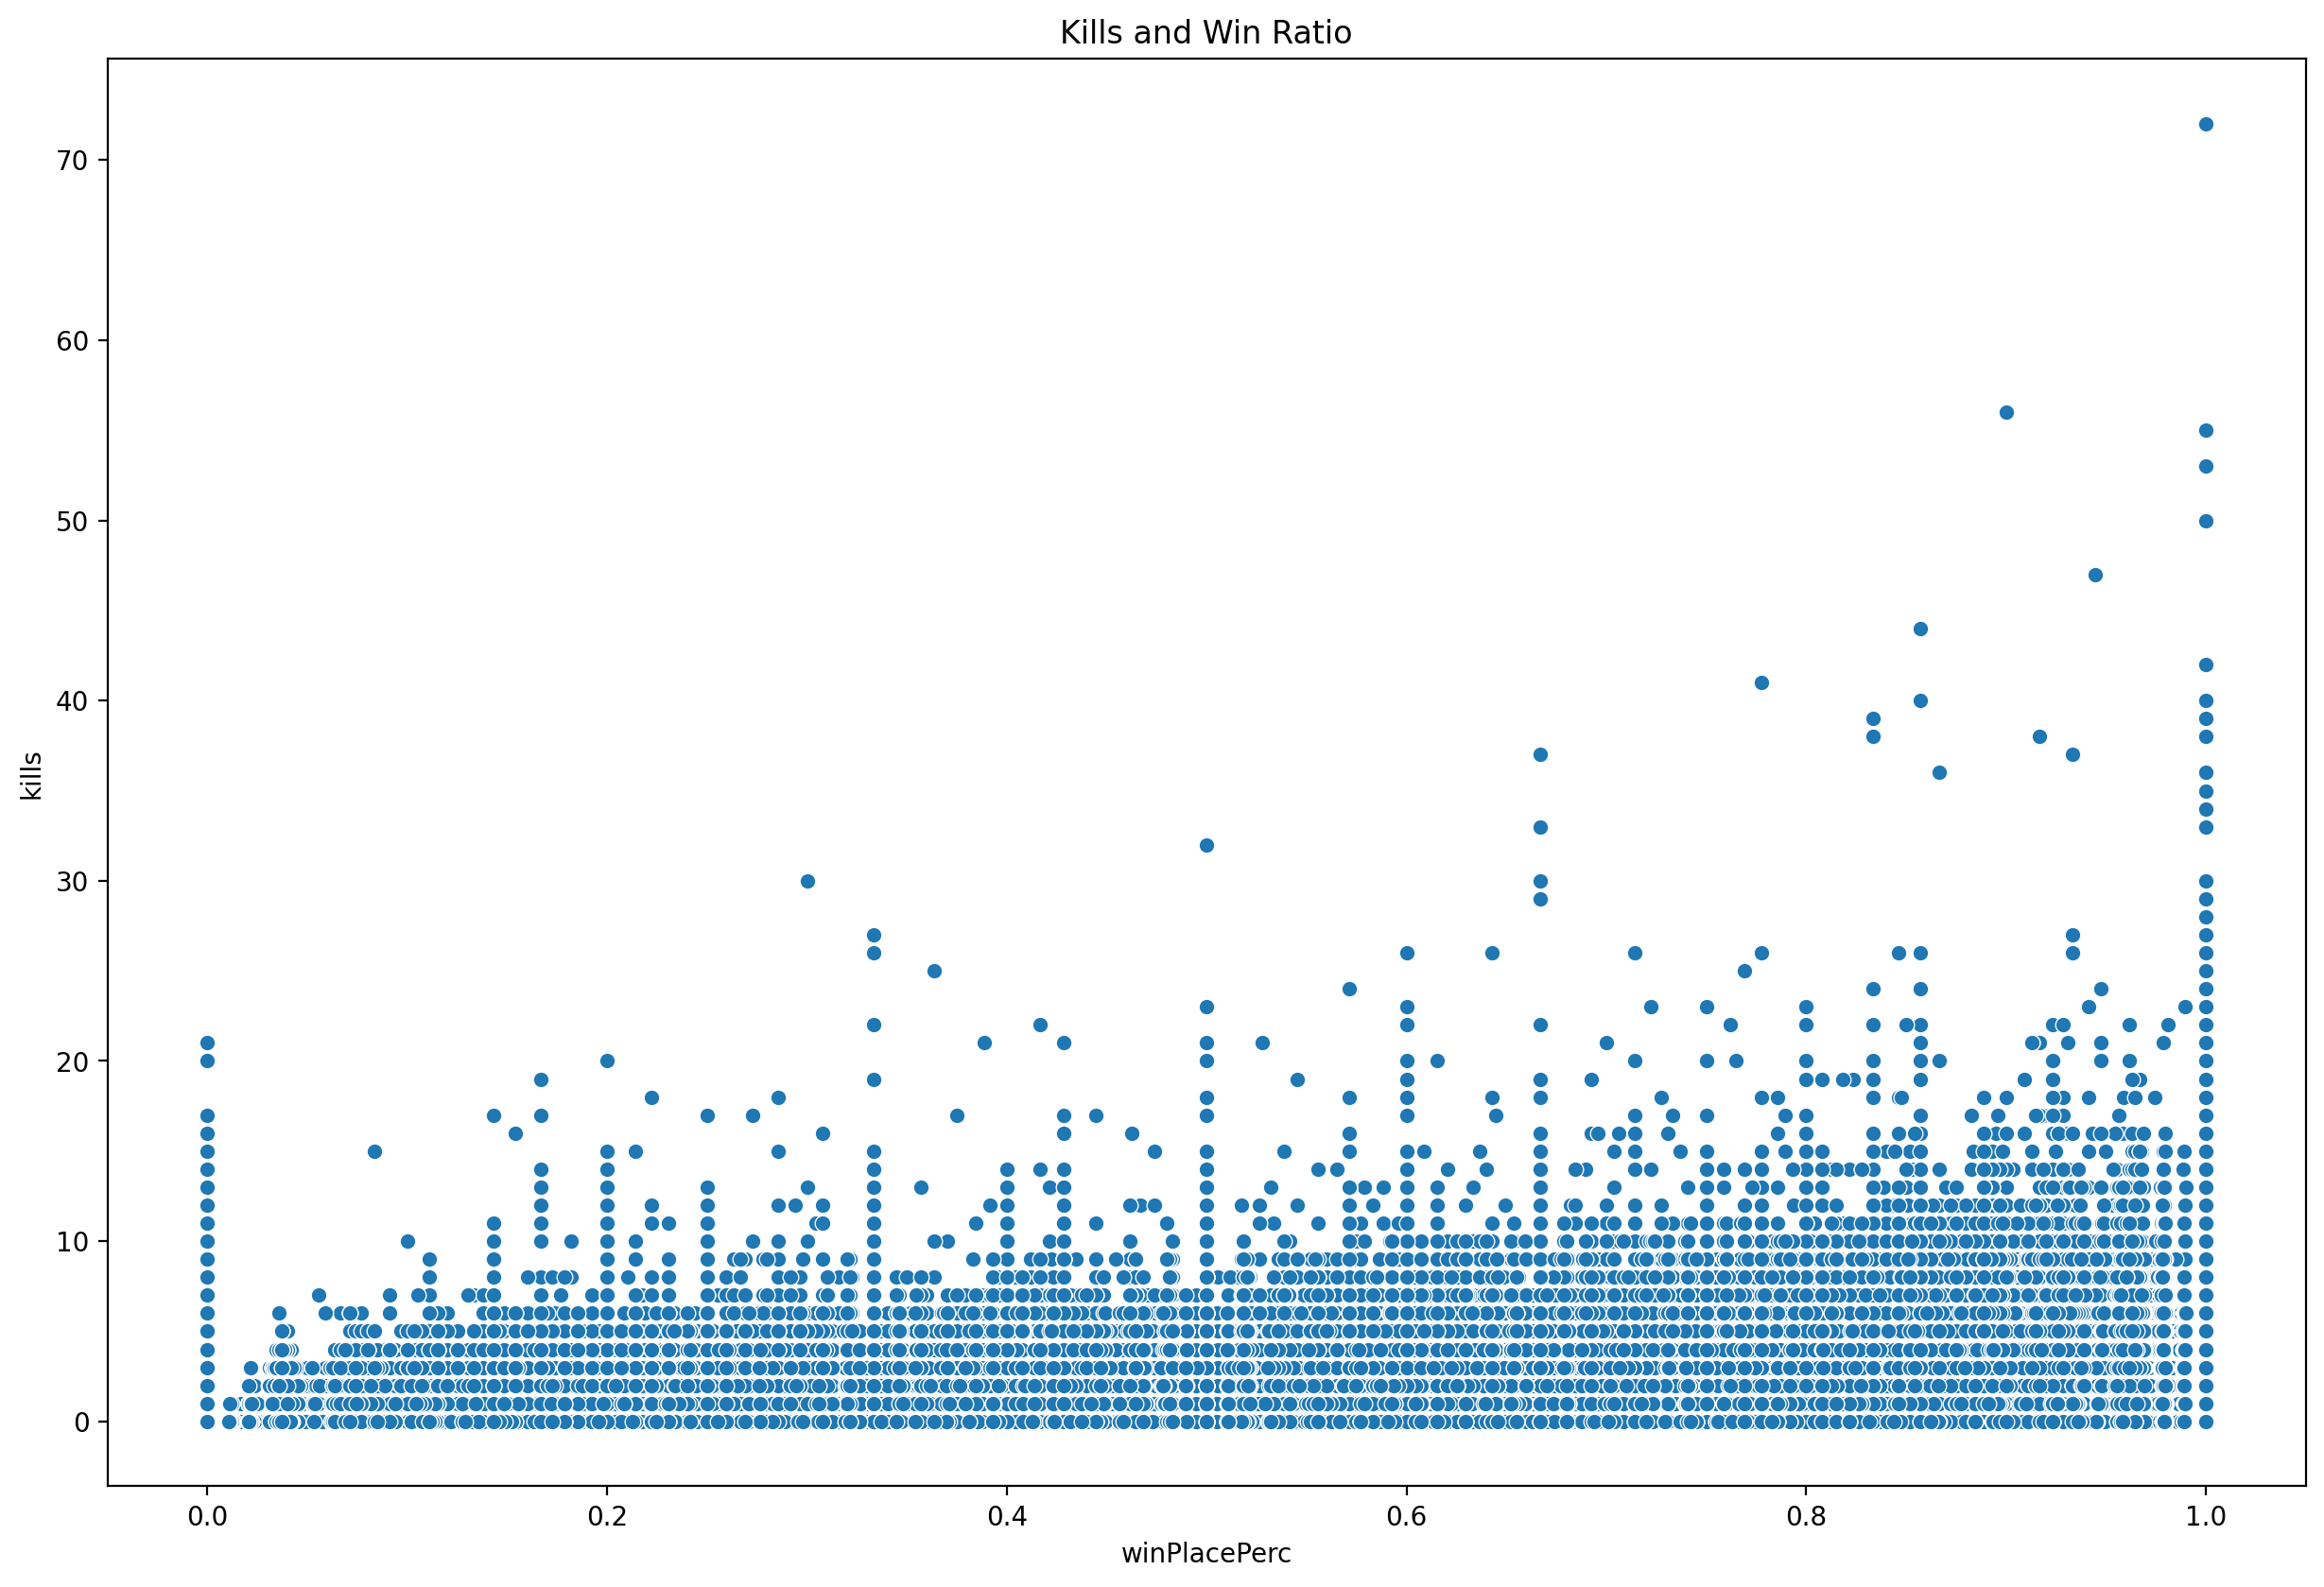

In [29]:
plt.figure(figsize=(15,10),dpi=200)
sns.scatterplot(x='winPlacePerc',y='kills',data=df)
plt.title('Kills and Win Ratio')
plt.show()

In [30]:
correlation = df['winPlacePerc'].corr(df['kills'])
print(correlation)

0.41852697331586186


### Observation
- The Graph shows that more number of kills dont increases the chances of winning the game

---

In [31]:
df['headshotKills'].unique()

array([ 0,  3,  2,  1,  4,  5,  6,  7,  8, 12, 10,  9, 11, 14, 13, 15, 19,
       34, 35, 31, 17, 42, 16, 64, 26, 18], dtype=int64)

In [32]:
df['matchType'].unique()

array(['squad-fpp', 'solo-fpp', 'solo', 'duo', 'duo-fpp', 'squad',
       'normal-squad-fpp', 'normal-duo-fpp', 'normal-solo-fpp',
       'crashfpp', 'crashtpp', 'normal-squad', 'flaretpp', 'flarefpp',
       'normal-duo', 'normal-solo'], dtype=object)

In [33]:
df.matchType.replace(['squad-fpp','squad','normal-squad-fpp','normal-squad'],'Squad',inplace=True)

In [34]:
df.matchType.replace(['duo-fpp','duo','normal-duo-fpp','normal-duo'],'Duo',inplace=True)

In [35]:
df.matchType.replace(['solo-fpp','solo','normal-solo-fpp','normal-solo'],'Solo',inplace=True)

In [36]:
df.matchType.replace(['crashfpp','flaretpp','flarefpp','crashtpp'],'Special',inplace=True)

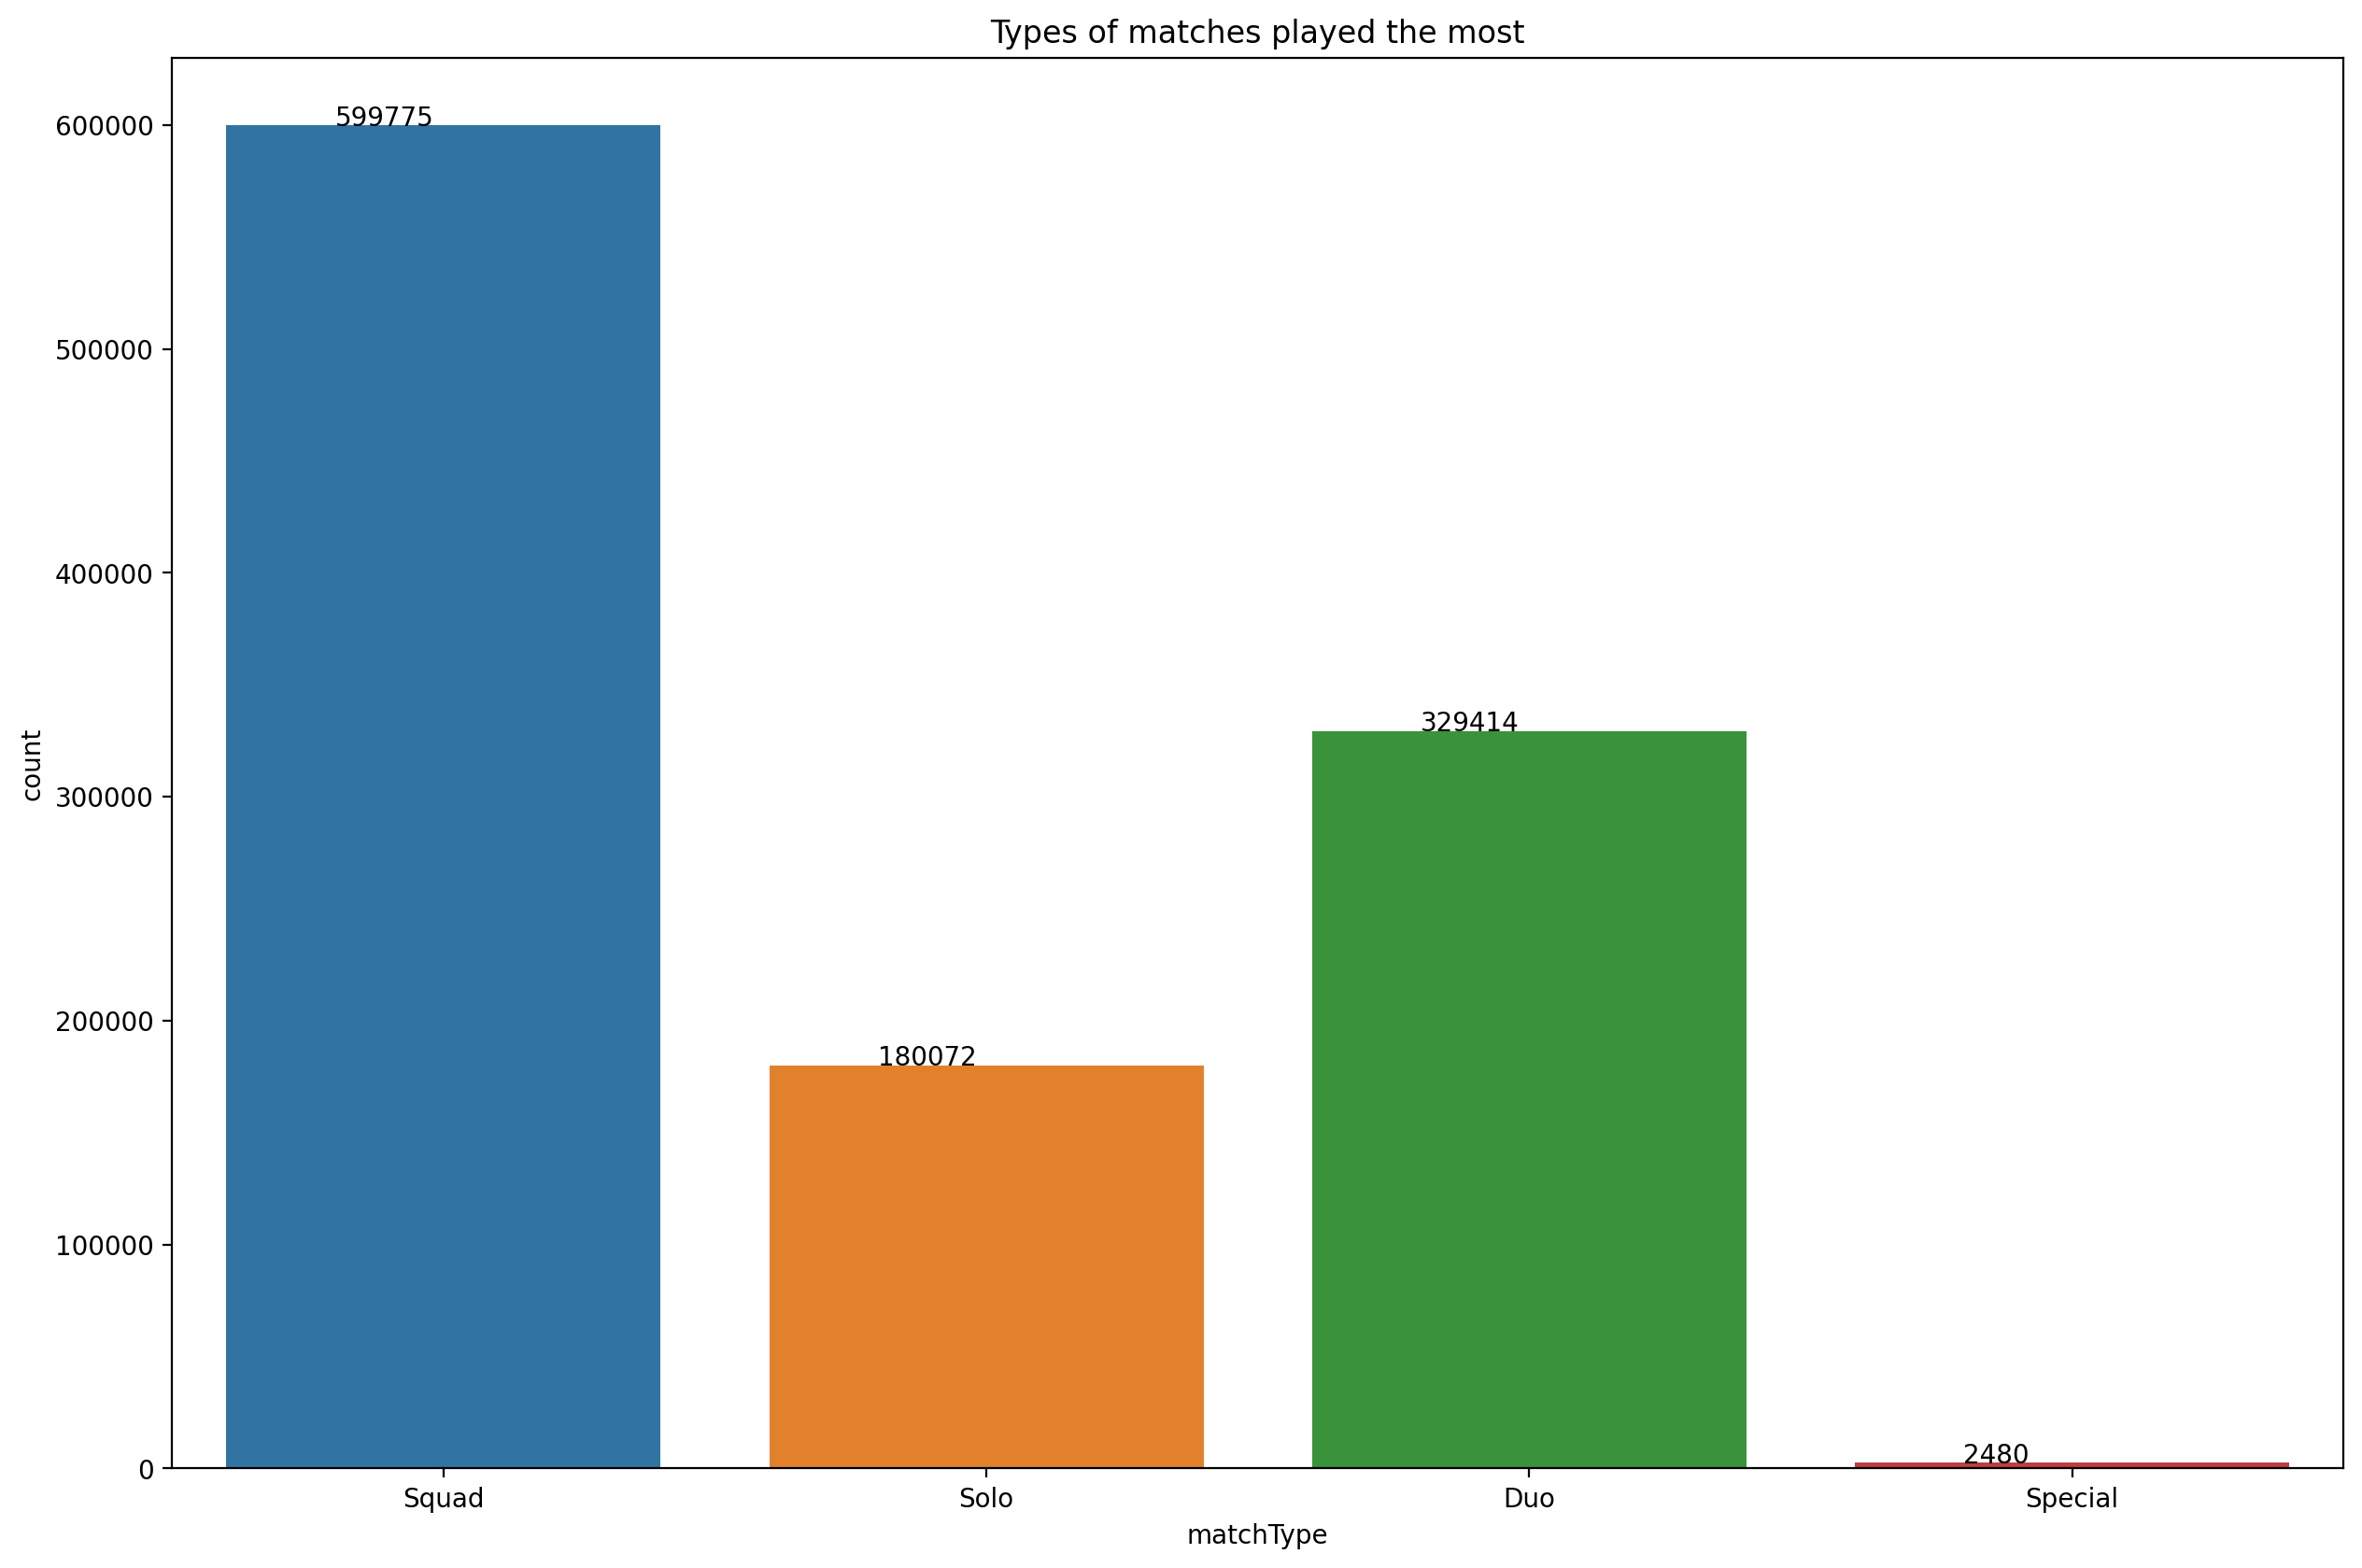

In [37]:
plt.figure(figsize=(15,10),dpi=200)
plt.title("Types of matches played the most")
ax = sns.countplot(data=df,x=df['matchType'].astype('str'))
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+10))
plt.show()

### Observation
- Almost **53.9%** of players play _Squad_
- **16.1** of players play _Solo_
- **29.6%** prefer to play _Duo_
- While the rest play _Special Events matches_

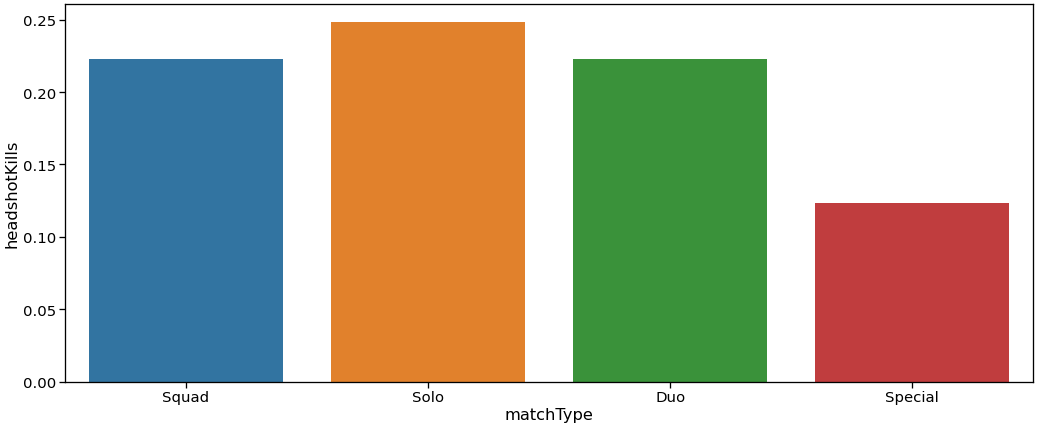

In [38]:
sns.set_context(context='talk', font_scale=1.3)
plt.figure(figsize=(25,10), dpi=50)
sns.barplot(y='headshotKills', x='matchType',ci=None,data=df)
plt.show()

### Observation
- The most amount of headshotkills are taken in Solo followed by Squad Duo and then specail game modes

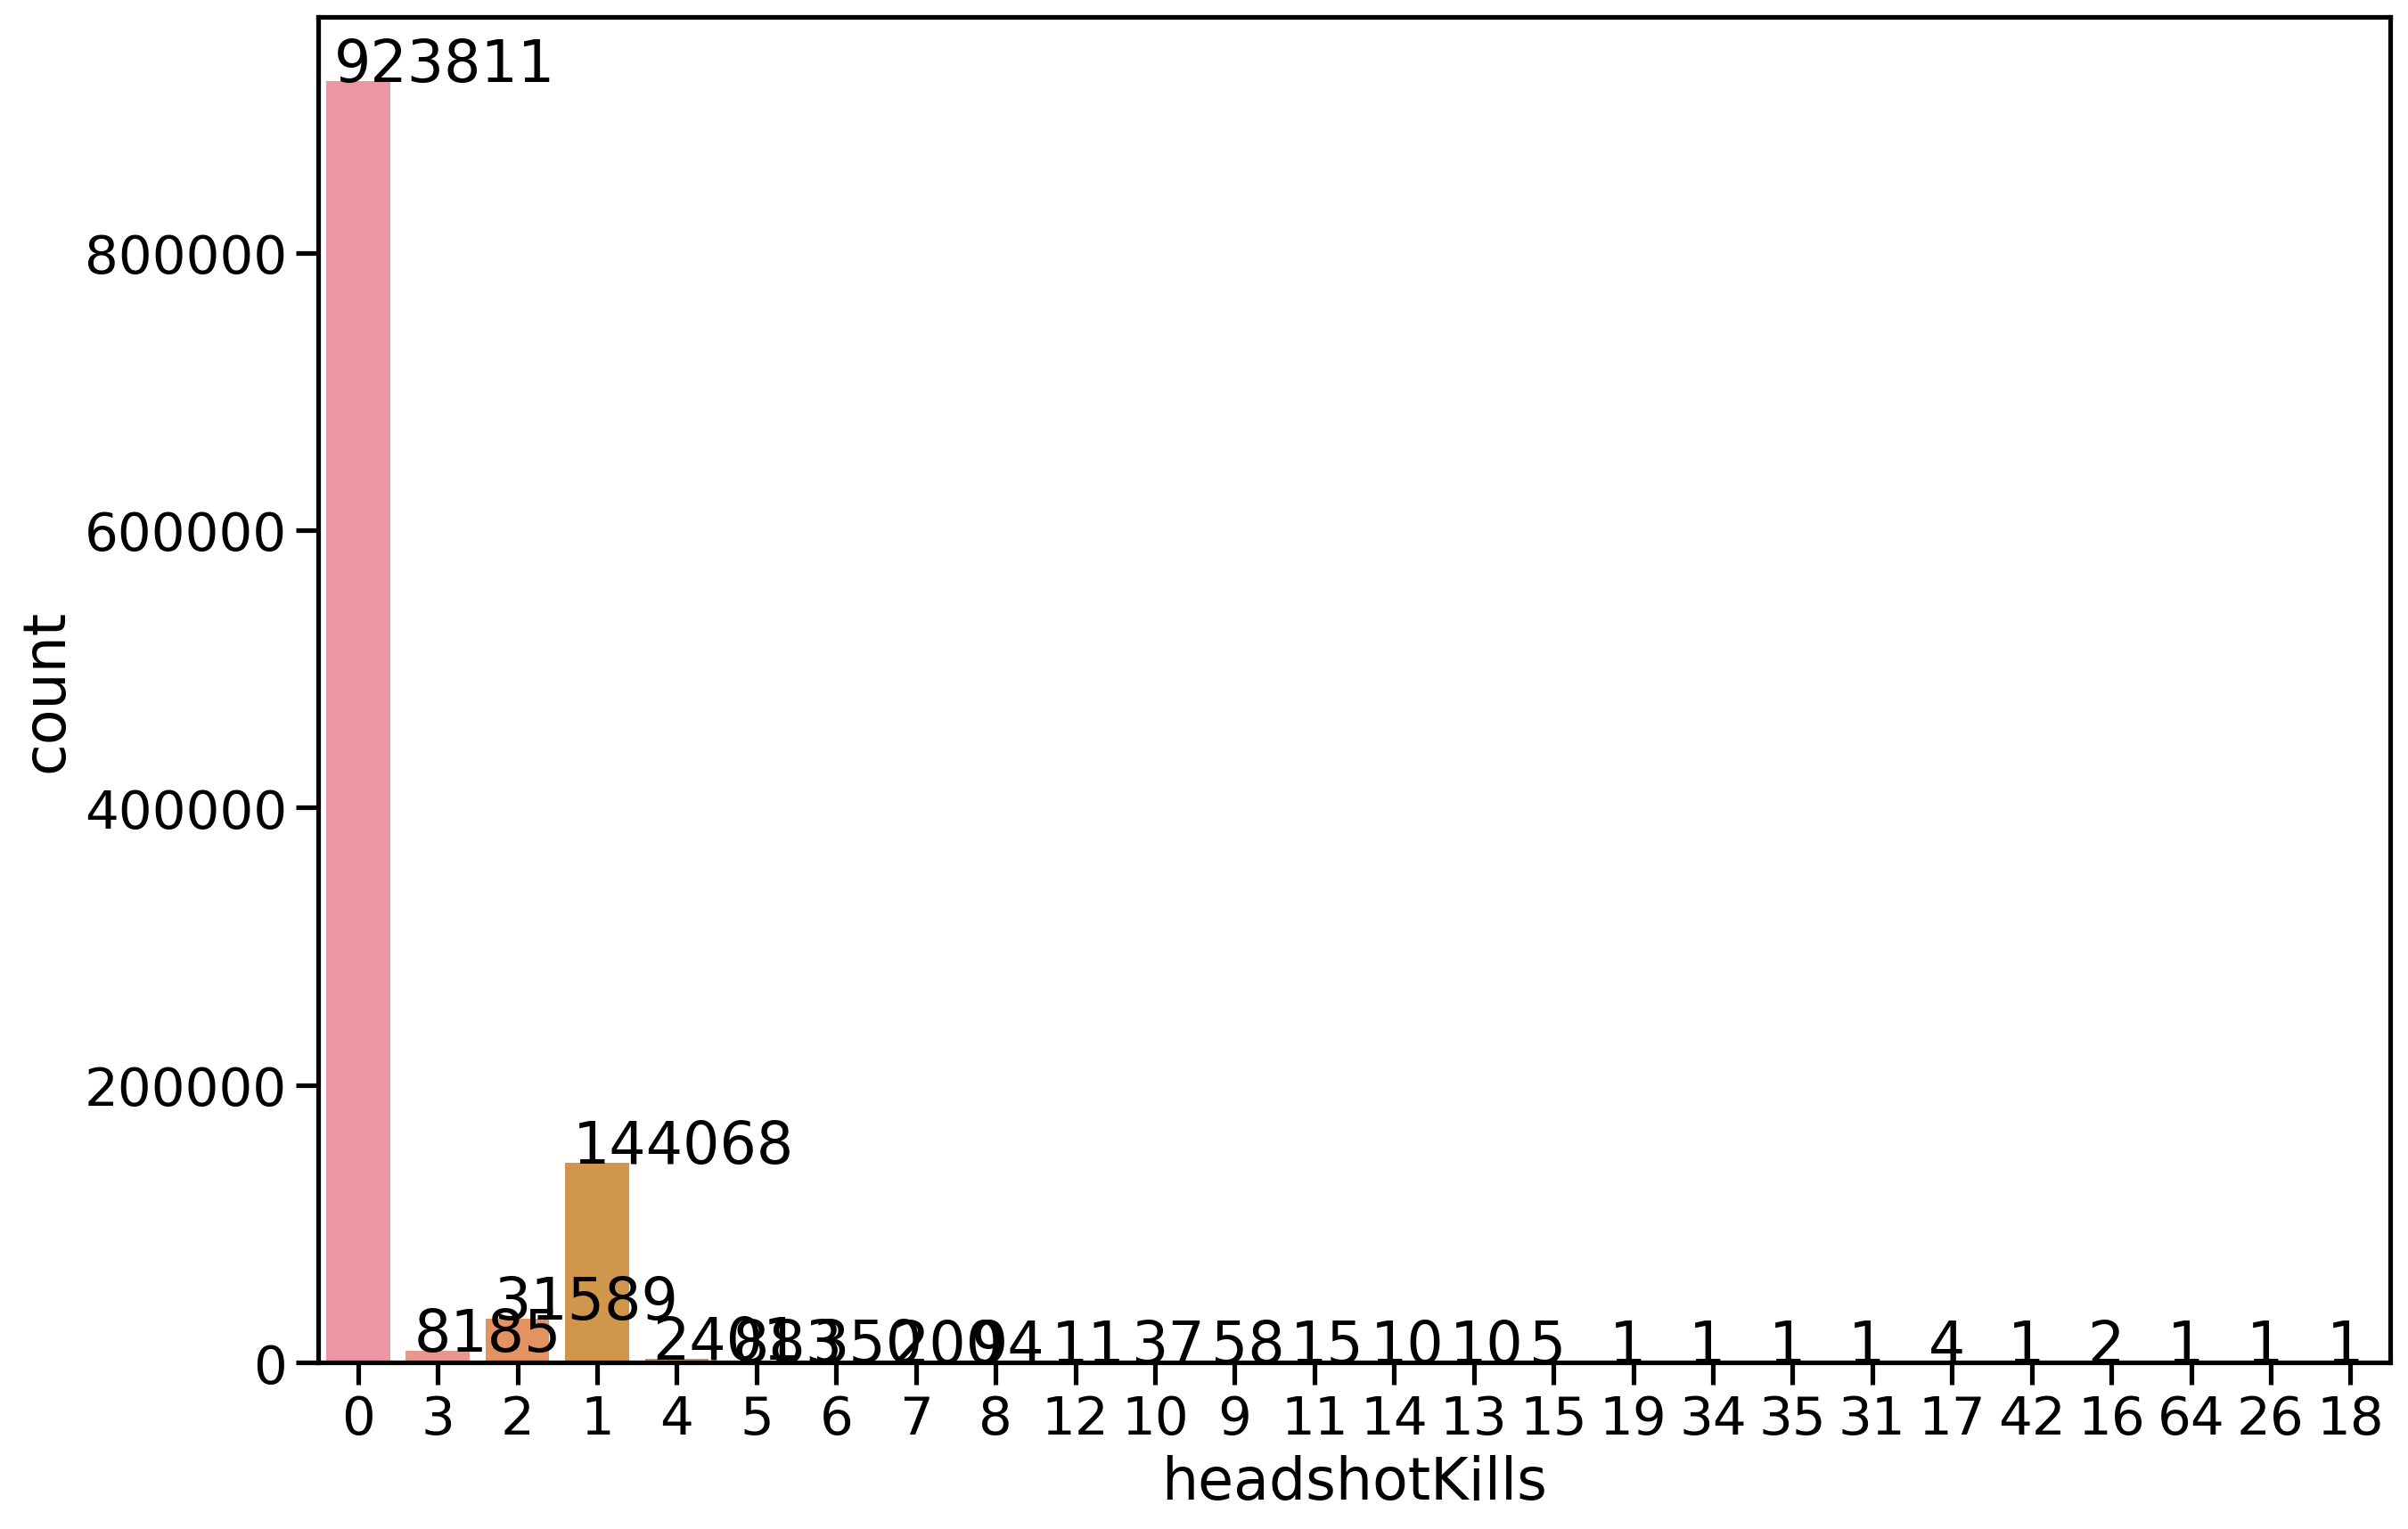

In [39]:
plt.figure(figsize=(15,10),dpi=200)
ax = sns.countplot(data=df,x=df['headshotKills'].astype('str'))
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+10))
plt.show()

In [40]:
min_threshold , max_threshold = df.headshotKills.quantile([0.09,0.99])
min_threshold,max_threshold
#Taking Quantile value to remove outliers from data using percentage method

(0.0, 3.0)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


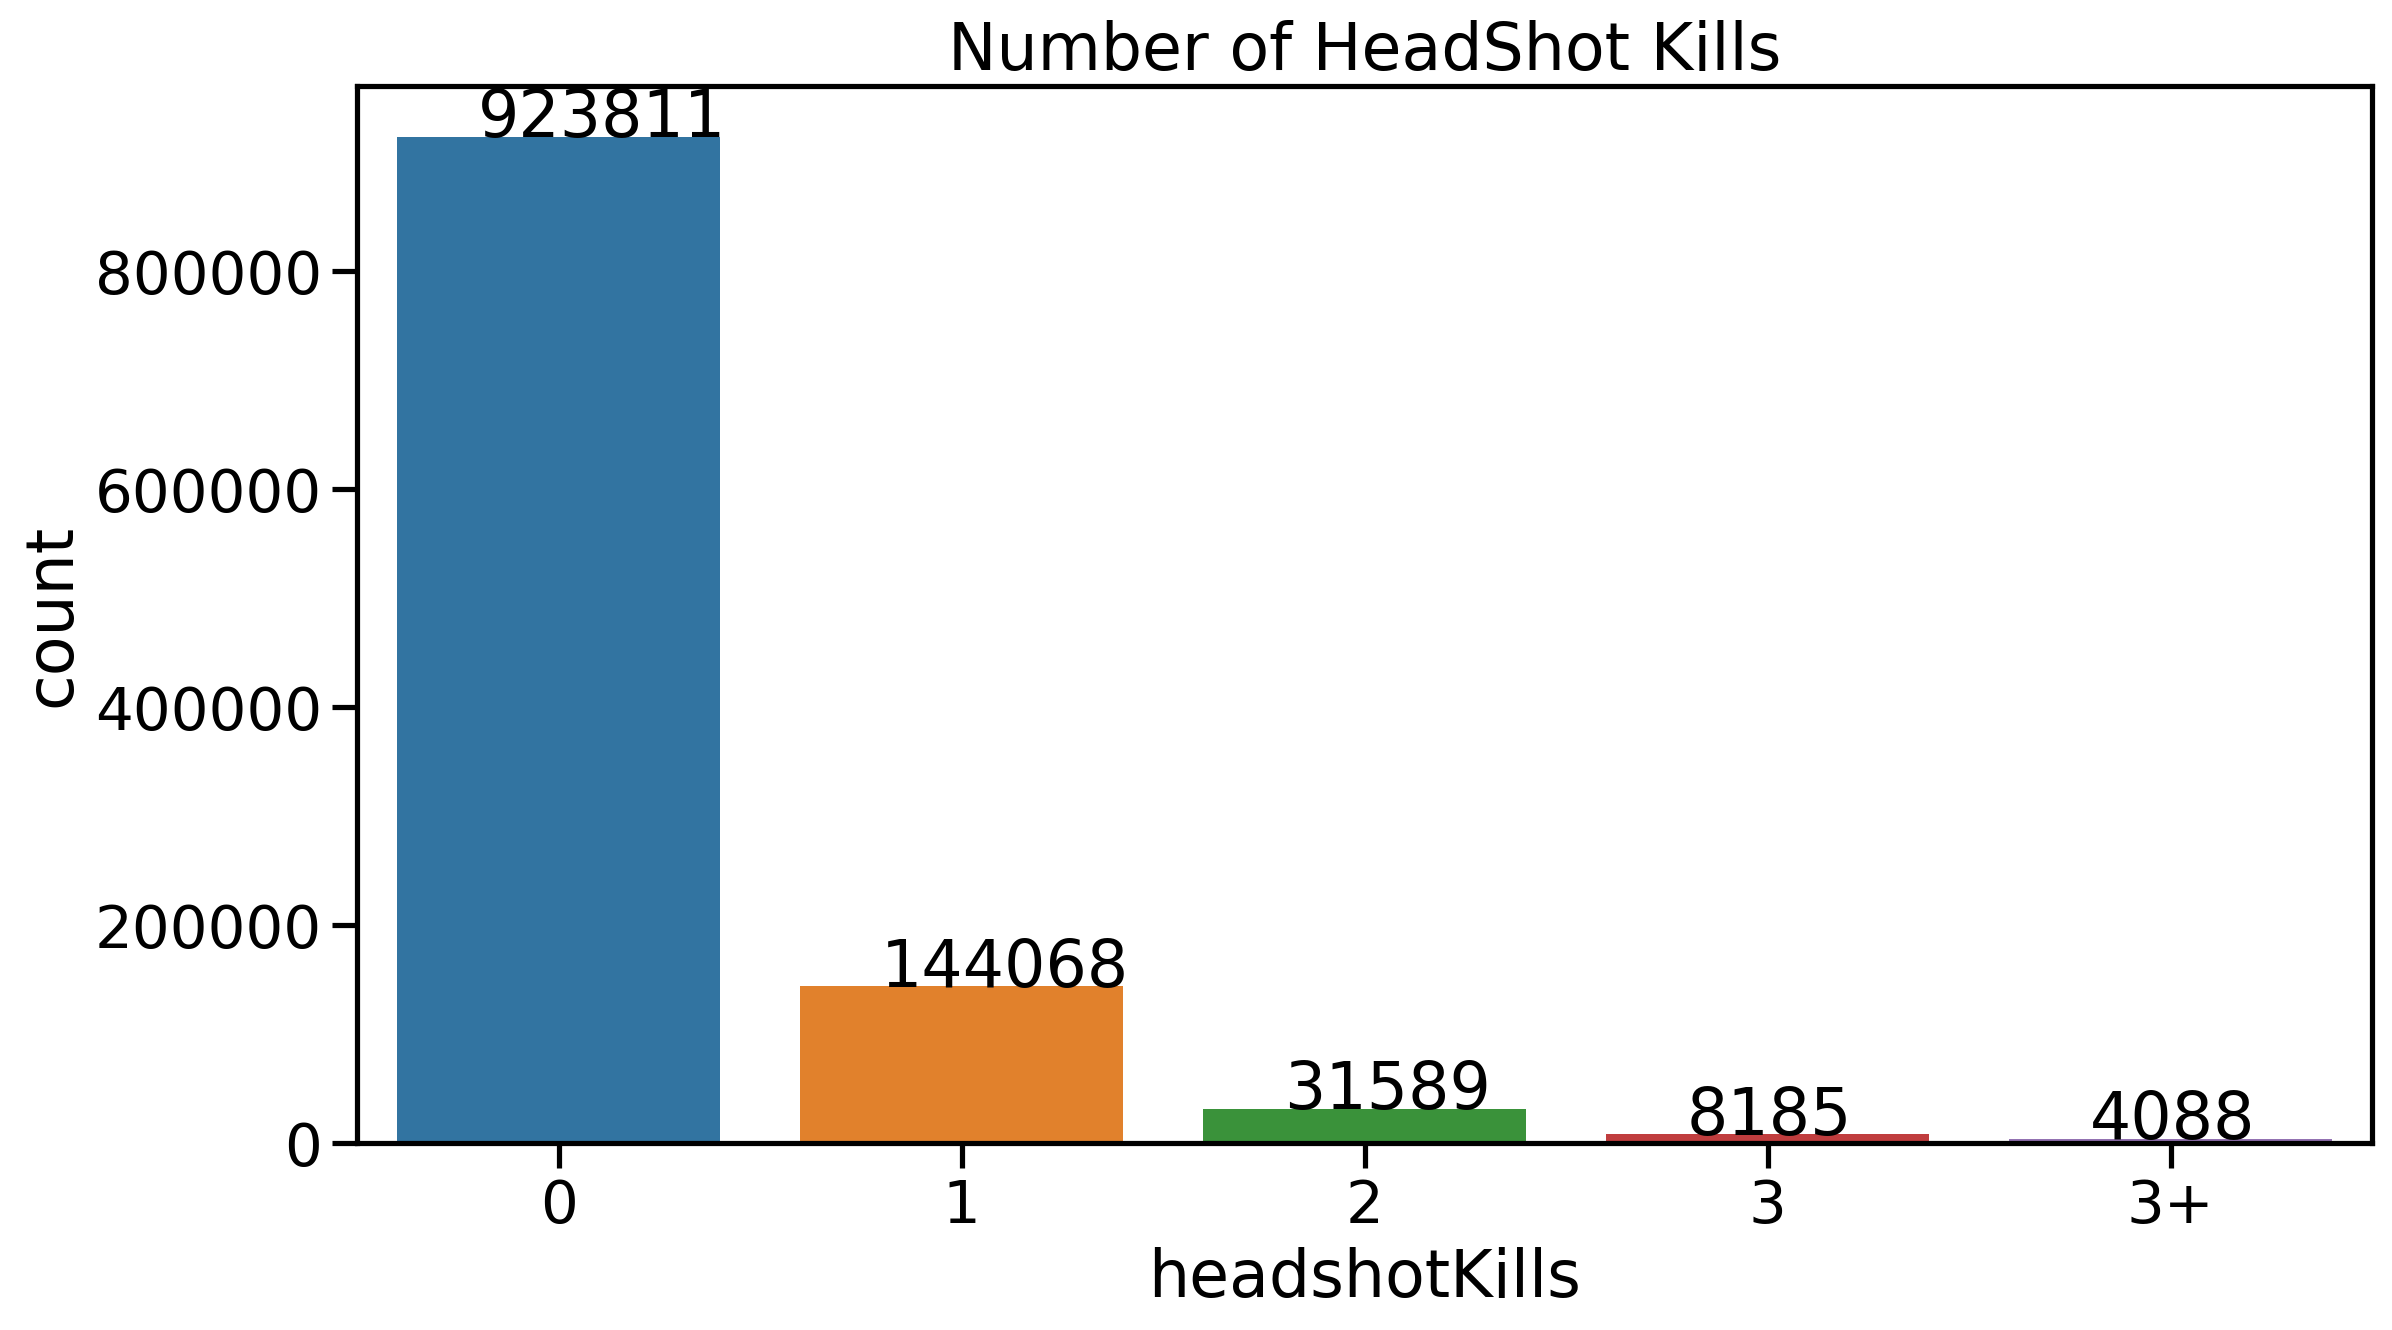

In [41]:
temp= df.copy()
temp.loc[temp['headshotKills'] > max_threshold] = '3+'
plt.figure(figsize=(13,7),dpi=200)
ax = sns.countplot(temp['headshotKills'].astype('str').sort_values())
plt.title('Number of HeadShot Kills')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+10))
plt.show()

### Observation
- **83%** of players dont even manage to score a single headshot in a game
- **16.5%** of players manage to get 1 , 2 or 3 headshots 
- **0.36%** of players get more than 3 headshots in a game

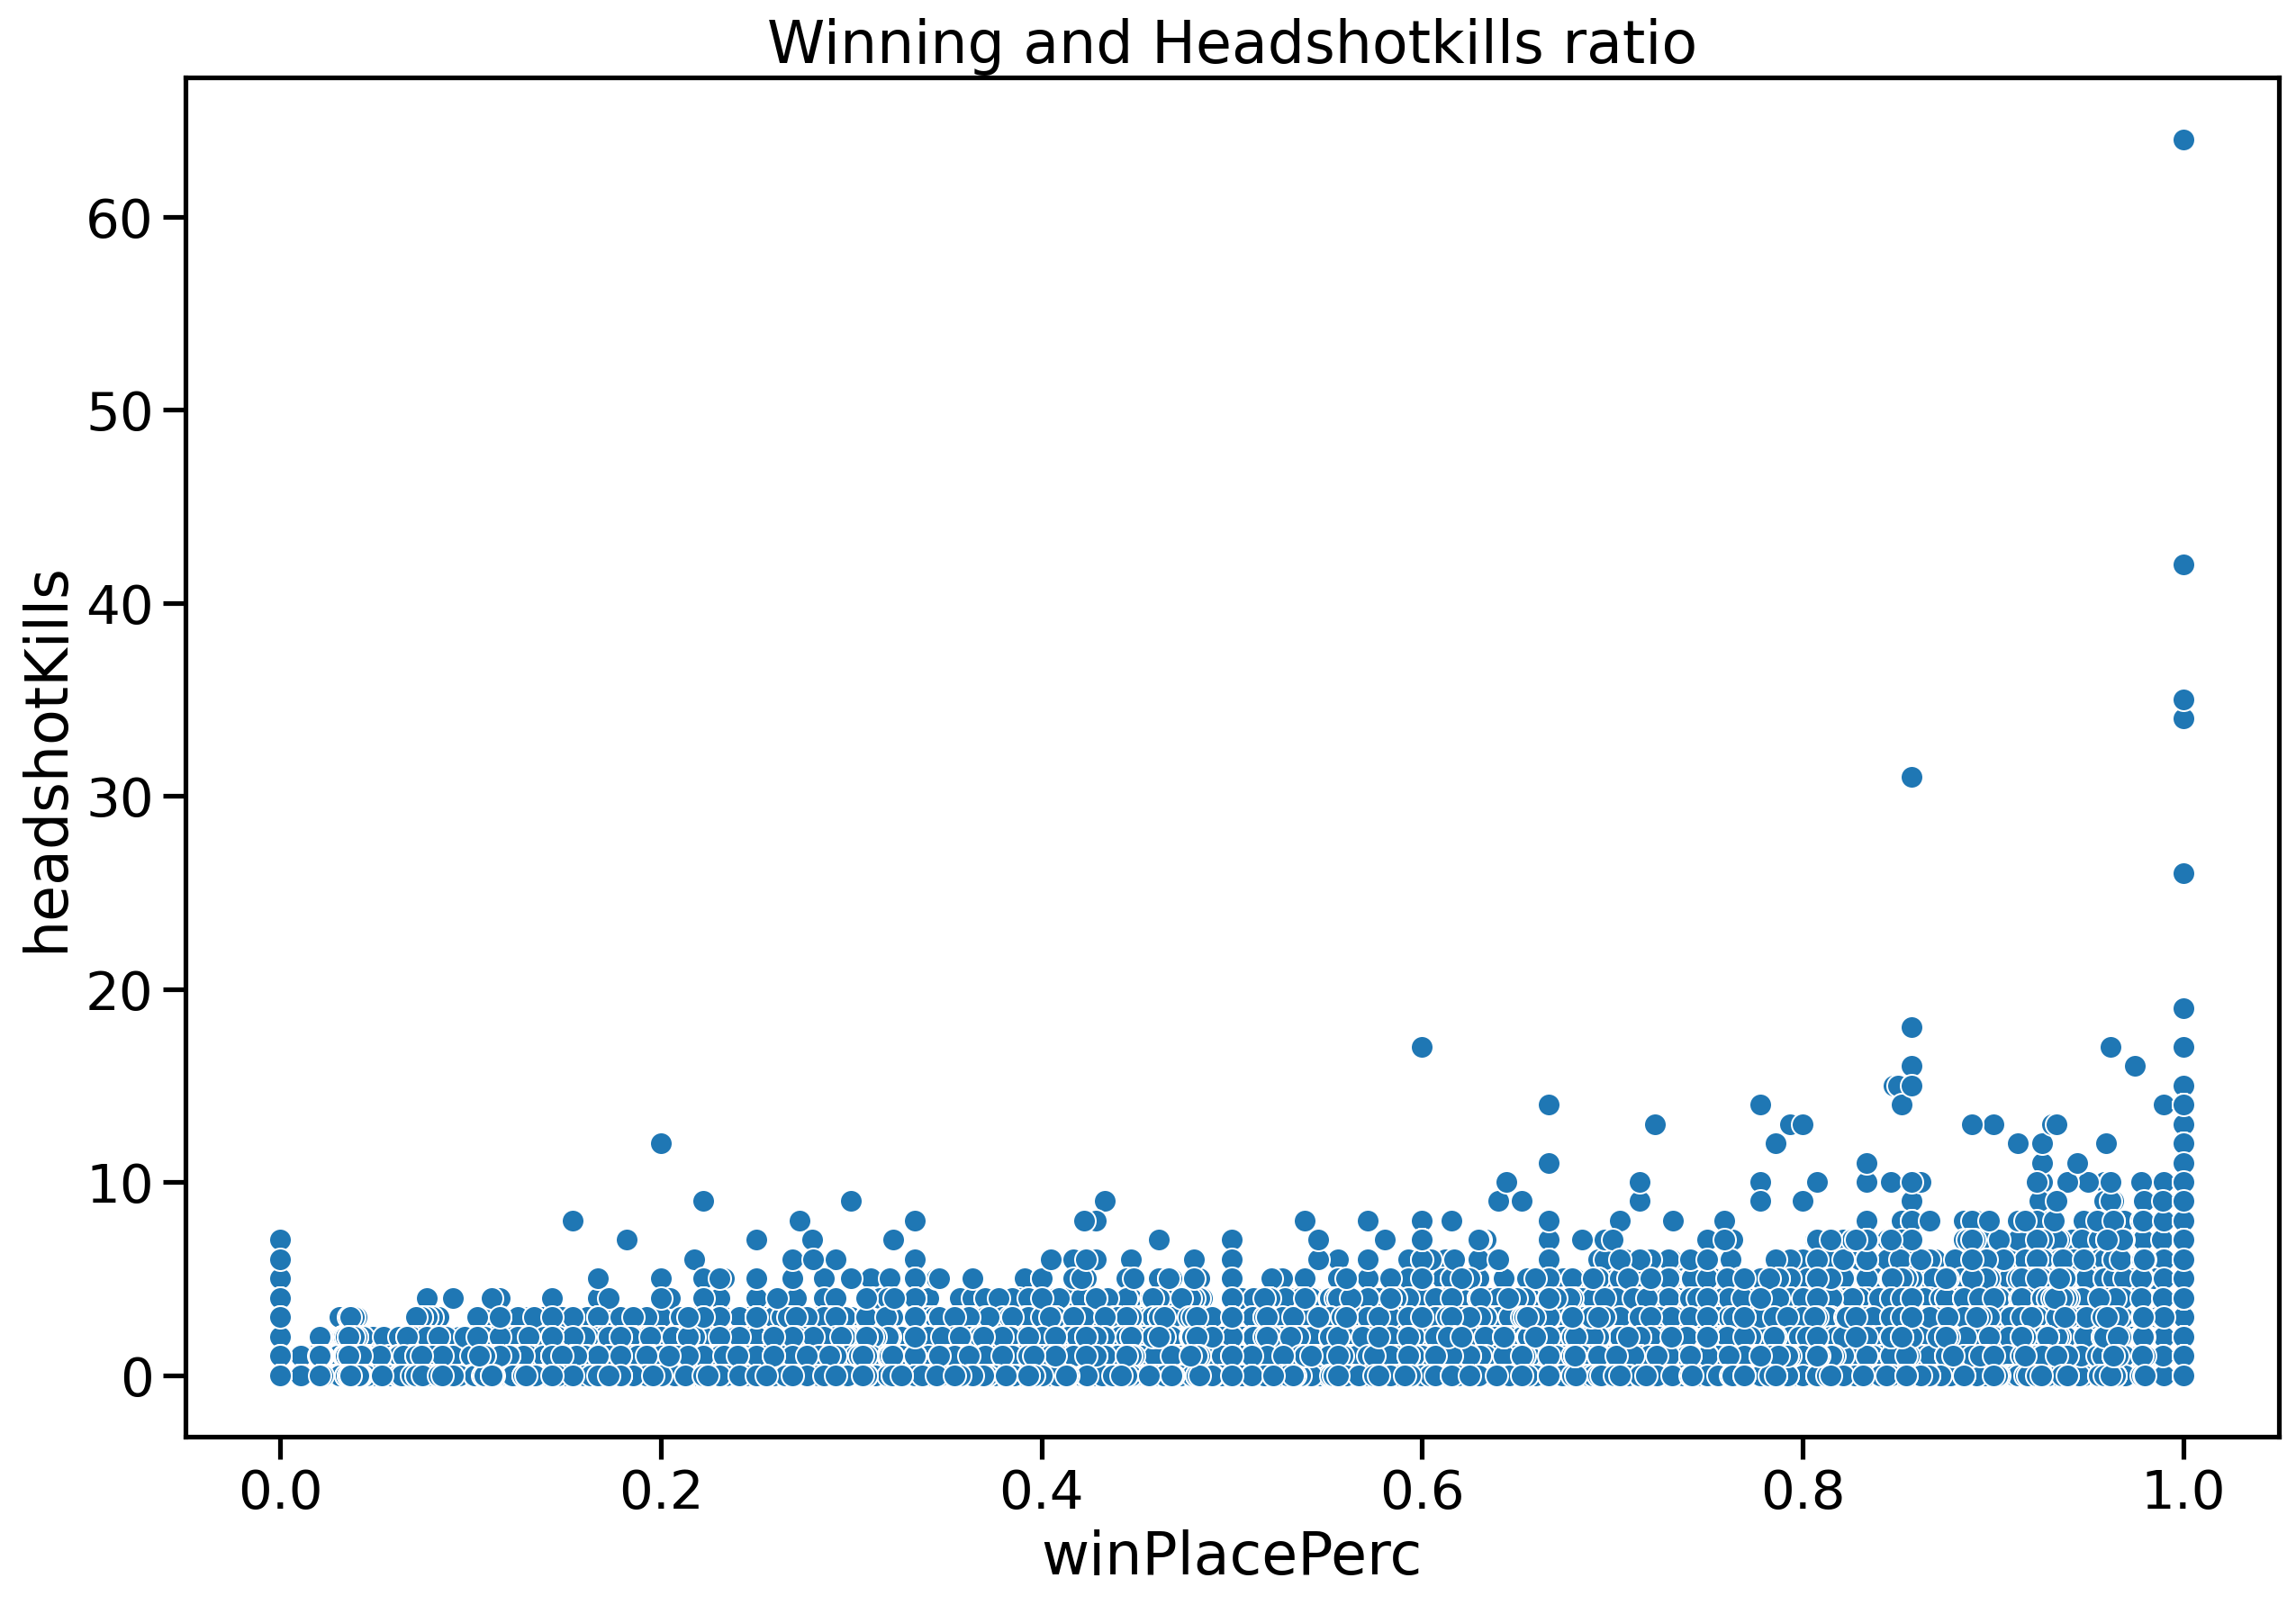

In [42]:
plt.figure(figsize=(15,10),dpi=200)
sns.scatterplot(x='winPlacePerc',y='headshotKills',data=df)
plt.title('Winning and Headshotkills ratio')
plt.show()

In [43]:
correlation = df['winPlacePerc'].corr(df['headshotKills'])
print(correlation)

0.27617008823176925


### Observation
- Number of Headshots are not the deciding factor for winning or loosing a game

---

In [44]:
df['DBNOs'].unique()

array([ 0,  2,  1,  3,  5,  4,  6,  9,  7,  8, 10, 12, 23, 17, 13, 11, 18,
       16, 15, 14, 20, 22, 19, 21, 27, 28, 25, 24, 32, 33, 35],
      dtype=int64)

In [45]:
min_threshold , max_threshold = df.DBNOs.quantile([0.09,0.99])
min_threshold,max_threshold
#Taking Quantile value to remove outliers from data using percentage method

(0.0, 5.0)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


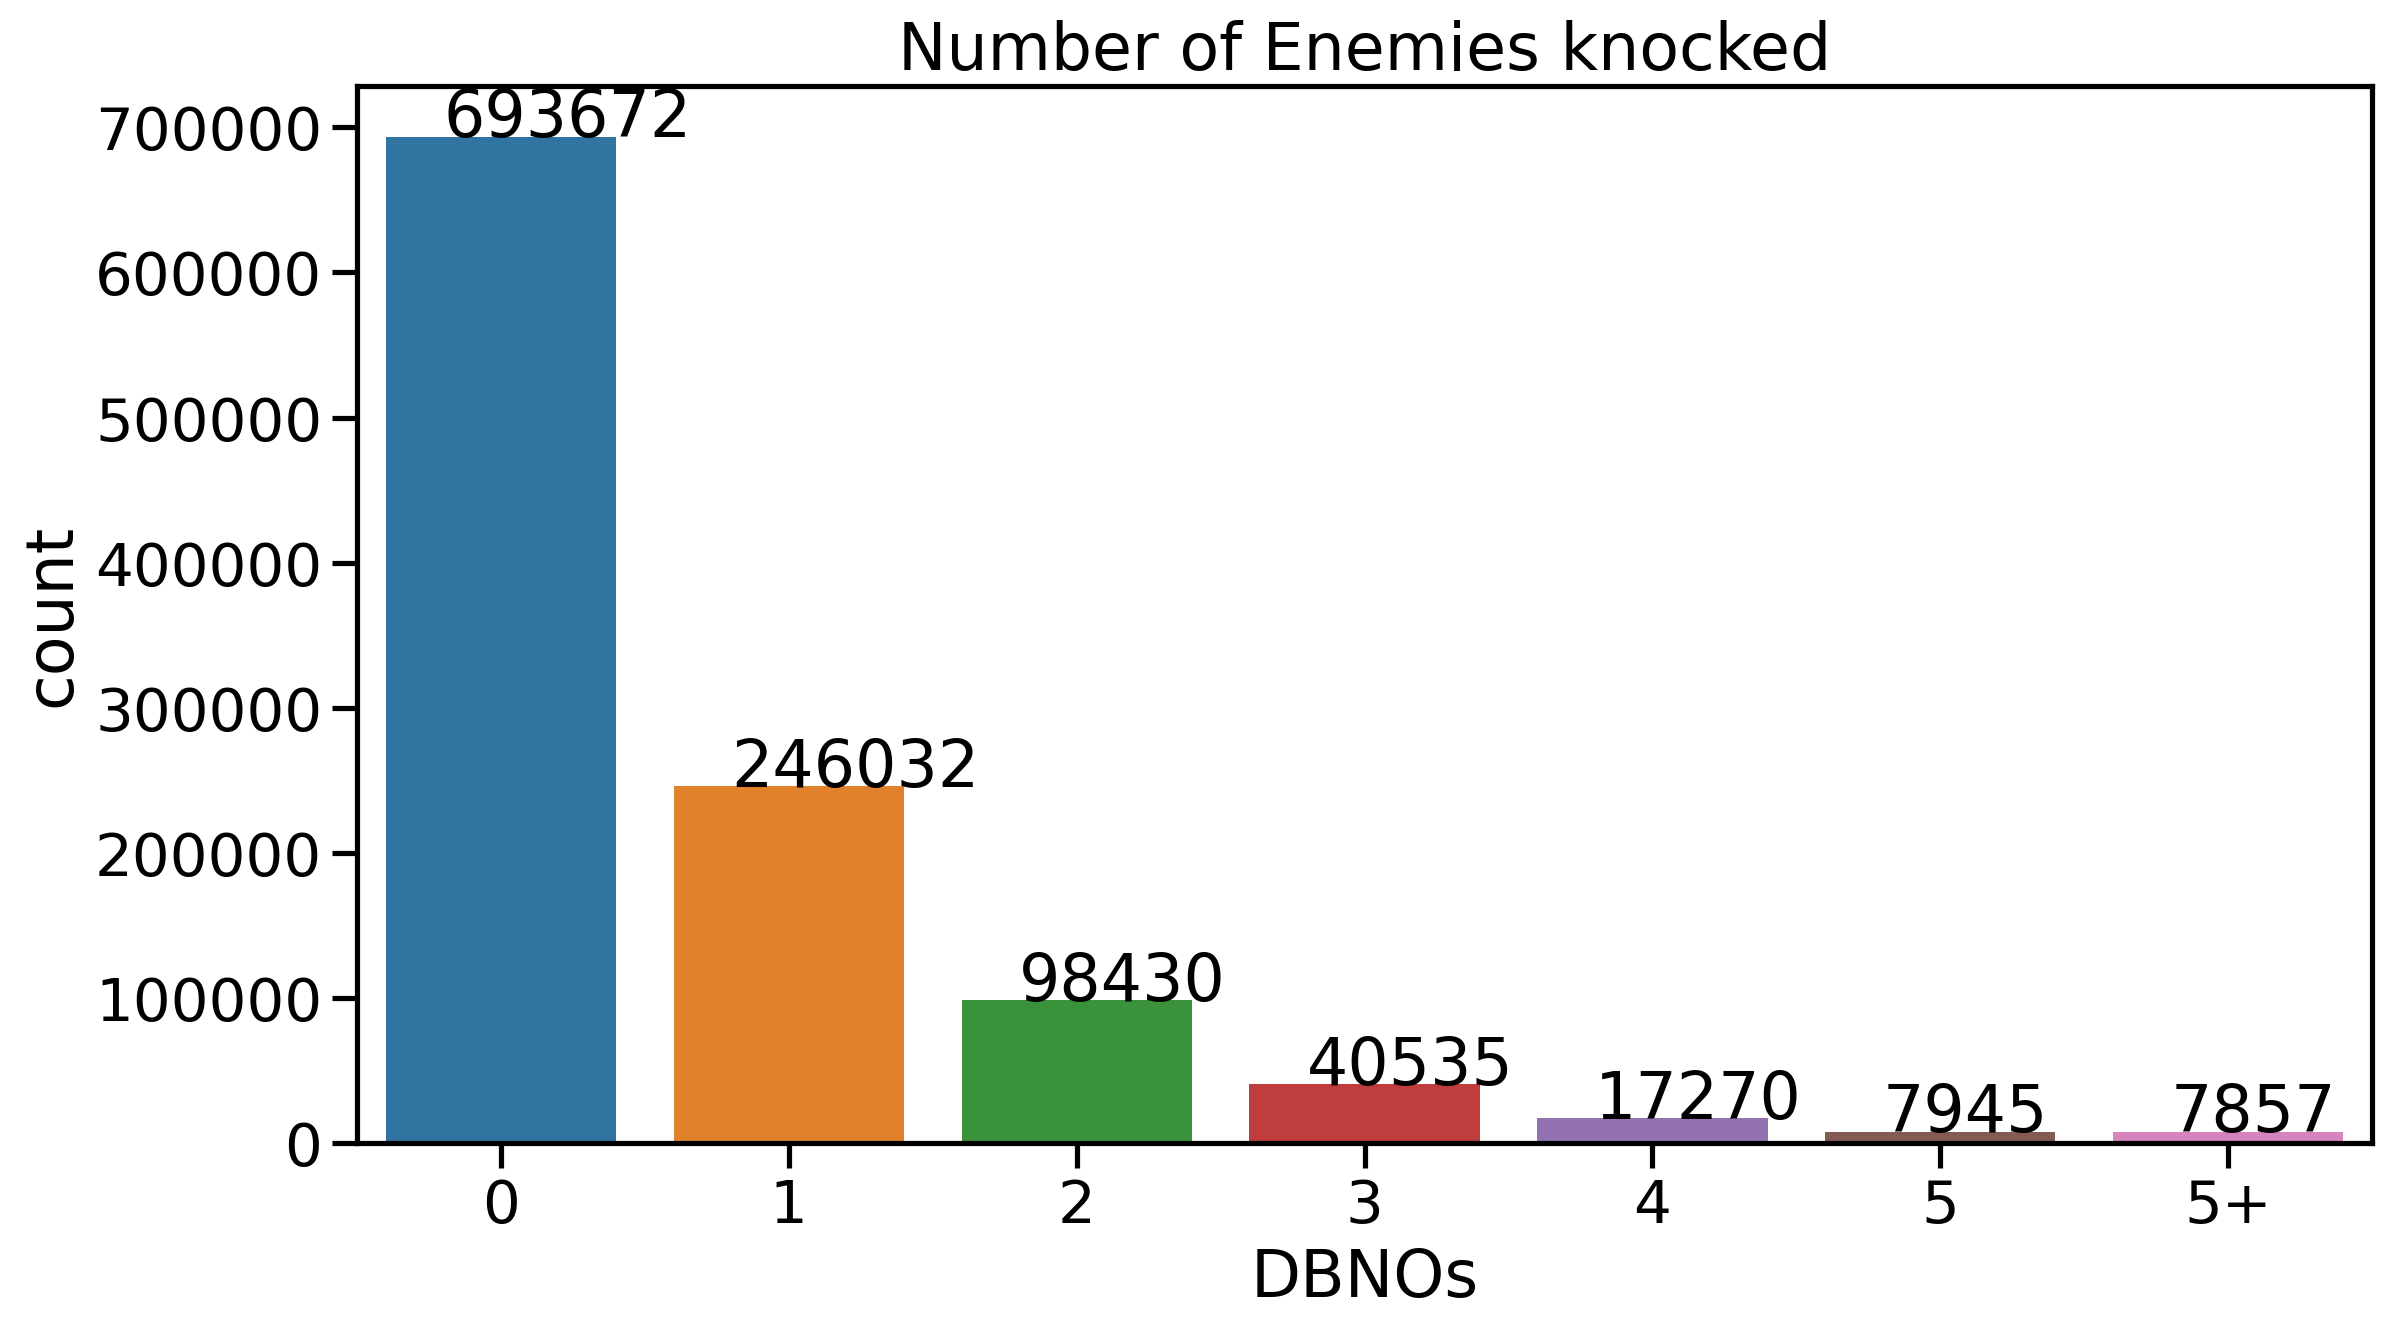

In [46]:
temp= df.copy()
temp.loc[temp['DBNOs'] > max_threshold] = '5+'
plt.figure(figsize=(13,7),dpi=200)
ax = sns.countplot(temp['DBNOs'].astype('str').sort_values())
plt.title('Number of Enemies knocked')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+10))
plt.show()

### Observation
- **62.3%** of players cant manage to knockdown a single player
- **36.8%** of players manage to knockdown atleast 1 and less than 6 players in a game
- **0.7%** of players manage to knockdown more than 5 players in a game

---

In [47]:
df['assists'].unique()

array([ 0,  2,  1,  3,  4,  5,  6, 12, 10,  7, 11,  8,  9, 13, 15, 17],
      dtype=int64)

In [48]:
min_threshold , max_threshold = df.assists.quantile([0.09,0.99])
min_threshold,max_threshold
#Taking Quantile value to remove outliers from data using percentage method

(0.0, 3.0)

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


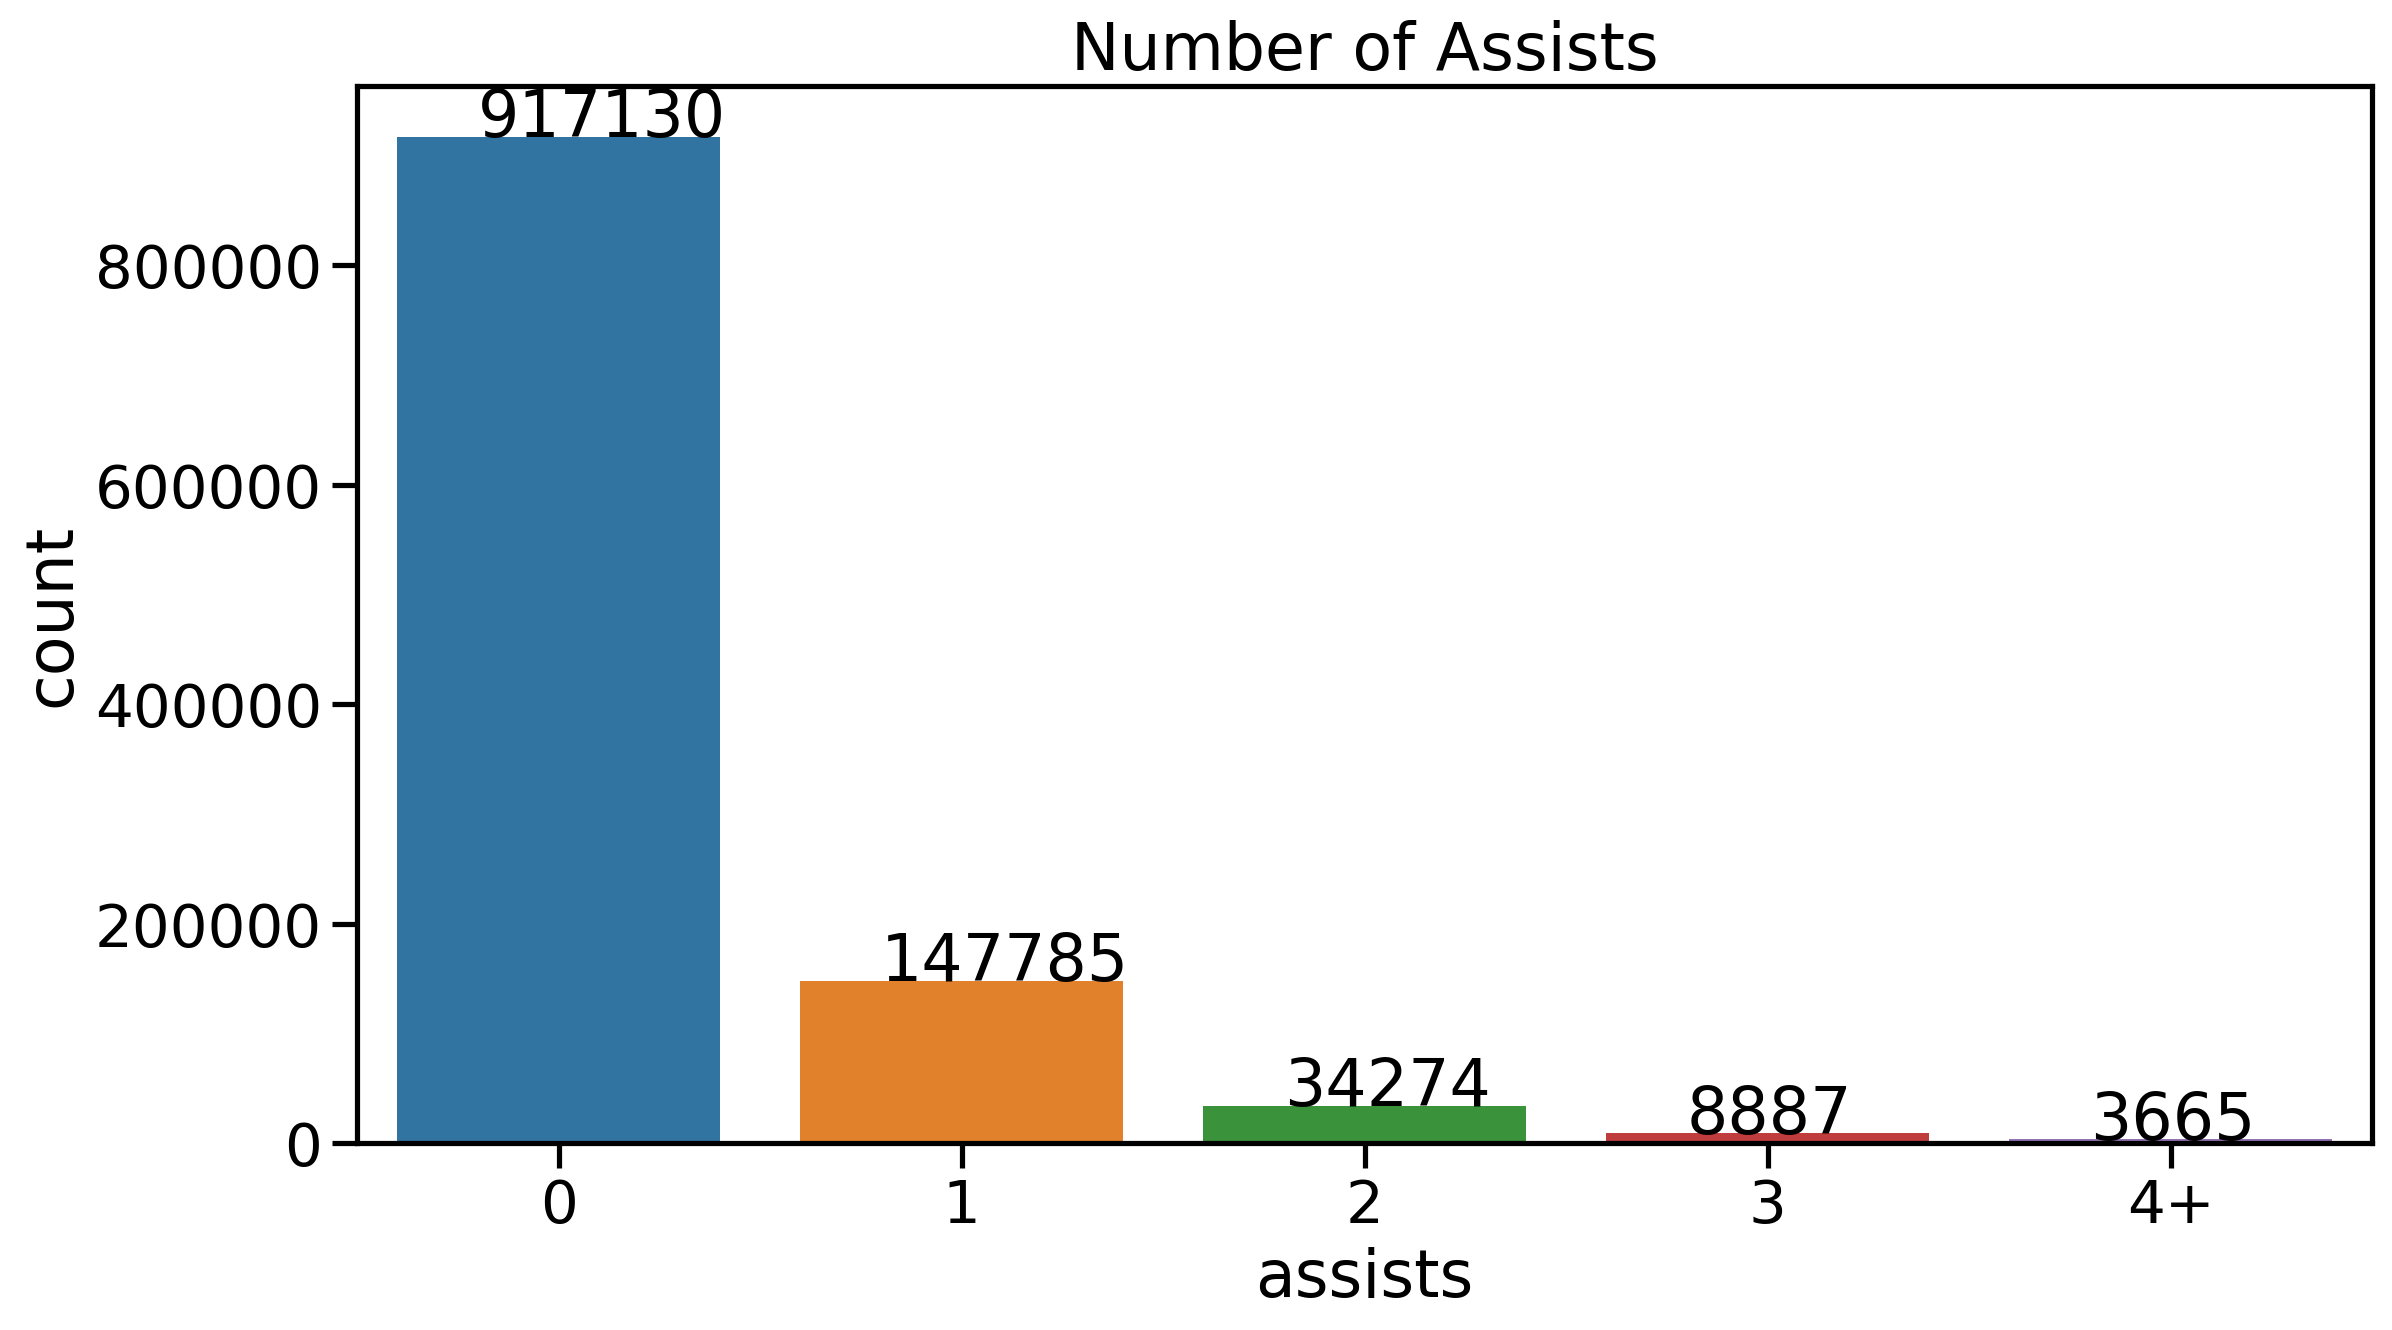

In [49]:
temp= df.copy()
temp.loc[temp['assists'] > max_threshold] = '4+'
plt.figure(figsize=(13,7),dpi=200)
ax = sns.countplot(temp['assists'].astype('str').sort_values())
plt.title('Number of Assists')
for p in ax.patches:
        ax.annotate('{}'.format(p.get_height()), (p.get_x()+0.2, p.get_height()+10))
plt.show()

### Observation
- **82%** of players have achieved 0 assists in a game
- **17%** of players have atleast 1 or less than 4 assists
- **0.32%** of players have assists of 4 or more

---

<Figure size 1200x800 with 0 Axes>

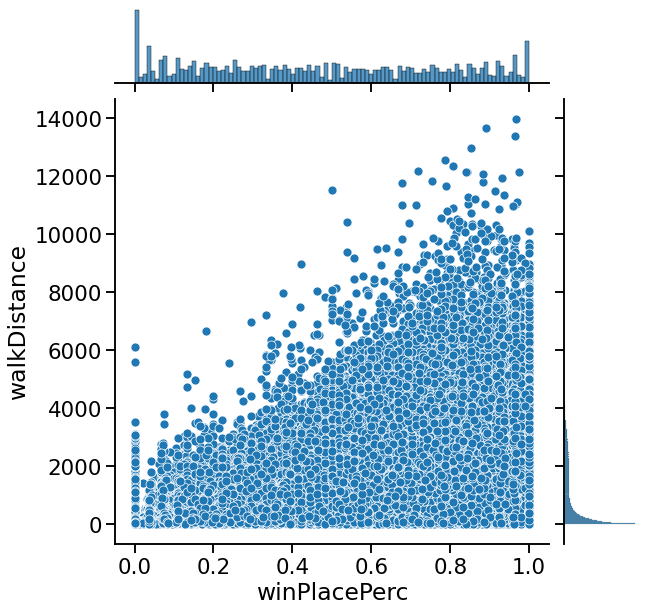

In [50]:
plt.figure(dpi=200)
sns.jointplot(x='winPlacePerc',y='walkDistance',height=9,data=df)
plt.show()

In [51]:
correlation = df['winPlacePerc'].corr(df['walkDistance'])
print(correlation)

0.8108166248653378


---

In [52]:
# damageDealt,killPoints,longestKill,rankPoints,rideDistance,swimDistance,walkDistance,winPoints

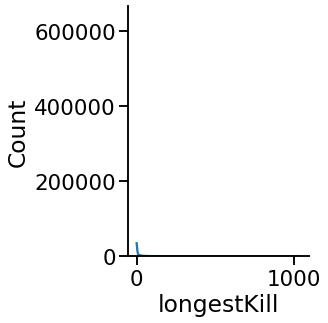

In [53]:
sns.displot(data=df,x=df.longestKill,kde=True)
plt.show()

In [ ]:

sns.displot(data=df,x=df.rideDistance,kde=True,height=7)
plt.show()

In [ ]:
sns.displot(data=df,x=df.swimDistance,kind="kde")
plt.show()

In [ ]:
sns.displot(data=df,x=df.walkDistance,kde=True,height=10)
plt.show()

In [ ]:
sns.displot(data=df,x=df.winPoints,kind="kde")
plt.show()

In [ ]:
sns.displot(data=df,x=df.damageDealt,kind="kde")
plt.show()

In [ ]:
sns.displot(data=df,x=df.DBNOs,kind="kde")
plt.show()